<a href="https://colab.research.google.com/github/YaelWeisman/Recidivism_ML_Projeect/blob/main/EDA_ML_unit2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df=pd.read_parquet(r"C:/Users/user1/Downloads/df_preper.parquet")

In [ ]:
df.columns

Index(['new_id', 'sex', 'race', 'judge_id', 'case_type', 'wcisclass',
       'age_offense', 'age_judge', 'prior_felony', 'prior_misdemeanor',
       'prior_criminal_traffic', 'highest_severity', 'release', 'probation',
       'is_recid_new', 'recid_180d', 'zip', 'pct_black', 'pct_hisp',
       'pct_male', 'pct_rural', 'pct_urban', 'pct_college', 'pct_food_stamps',
       'pop_dens', 'pct_somecollege', 'med_hhinc', 'year', 'jail',
       'prior_charges_severity7', 'prior_charges_severity8',
       'prior_charges_severity9', 'prior_charges_severity10',
       'prior_charges_severity11', 'prior_charges_severity12',
       'prior_charges_severity13', 'prior_charges_severity14',
       'prior_charges_severity15', 'prior_charges_severity16',
       'prior_charges_severity17', 'prior_charges_severity18',
       'prior_charges_severity19', 'prior_charges_severity20',
       'prior_charges_severity21', 'max_hist_jail', 'min_hist_jail',
       'avg_hist_jail', 'median_hist_jail', 'all_races', 'r

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476967 entries, 0 to 1476966
Data columns (total 55 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   new_id                    1476967 non-null  int64   
 1   sex                       1476967 non-null  int64   
 2   race                      1476967 non-null  category
 3   judge_id                  1476967 non-null  int64   
 4   case_type                 1476967 non-null  category
 5   wcisclass                 1471484 non-null  category
 6   age_offense               1476967 non-null  int64   
 7   age_judge                 1476967 non-null  int64   
 8   prior_felony              1476967 non-null  int64   
 9   prior_misdemeanor         1476967 non-null  int64   
 10  prior_criminal_traffic    1476967 non-null  int64   
 11  highest_severity          1476967 non-null  float64 
 12  release                   1476967 non-null  int64   
 13  probation   

In [ ]:
# These columns are not informative for the model:
# 'zip' does not provide meaningful geographic detail this is a false vaue in order not to disclose identifying information.,
# and 'judge_id' is an identifier with too many unique values to be useful (id of judge).
df=df.drop(columns=['zip','judge_id'])

In [ ]:
cols=['race','sex','release','probation','is_recid_new','recid_180d','recid_180d_violent'] #binary and category cols
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
#Change them all to float  to avoid  errors in creating documnts
for col in df.select_dtypes(include=["Int64",'int64']):
    df[col] = df[col].astype("float64")

In [ ]:
integer_col=df.select_dtypes(include='float64')
integer_col=integer_col.drop(columns='ID')
integer_col=integer_col.columns.to_list()
df['all_races']=df['all_races'].astype('string')

### Crime Rate Map by County in Wisconsin

In [ ]:
# Install and import folium if not already installed
# !pip install folium
import folium
from folium.plugins import MarkerCluster
# Coordinates of all Wisconsin counties
wisconsin_counties_coords = {
    "Adams": [43.9748, -89.7662],
    "Ashland": [46.5787, -90.6782],
    "Barron": [45.4474, -91.8493],
    "Bayfield": [46.5583, -91.2035],
    "Brown": [44.4731, -88.0027],
    "Buffalo": [44.3563, -91.7539],
    "Burnett": [45.8373, -92.3731],
    "Calumet": [44.0811, -88.2487],
    "Chippewa": [45.0614, -91.2766],
    "Clark": [44.7343, -90.6064],
    "Columbia": [43.4610, -89.3356],
    "Crawford": [43.2496, -90.9244],
    "Dane": [43.0687, -89.4167],
    "Dodge": [43.4200, -88.7109],
    "Door": [44.8347, -87.3662],
    "Douglas": [46.4132, -91.9256],
    "Dunn": [44.9490, -91.9091],
    "Eau Claire": [44.7776, -91.2868],
    "Florence": [45.8745, -88.3974],
    "Fond du Lac": [43.7555, -88.4881],
    "Forest": [45.6654, -88.7683],
    "Grant": [42.8678, -90.7064],
    "Green": [42.6783, -89.6252],
    "Green Lake": [43.8014, -88.9585],
    "Iowa": [42.9743, -90.1354],
    "Iron": [46.2942, -90.2423],
    "Jackson": [44.3201, -90.8000],
    "Jefferson": [43.0058, -88.8075],
    "Juneau": [43.9340, -90.1073],
    "Kenosha": [42.5812, -87.8212],
    "Kewaunee": [44.5300, -87.5483],
    "La Crosse": [43.9108, -91.0917],
    "Lafayette": [42.6569, -90.1305],
    "Langlade": [45.3091, -89.0154],
    "Lincoln": [45.3351, -89.7349],
    "Manitowoc": [44.1180, -87.6843],
    "Marathon": [44.9003, -89.7593],
    "Marinette": [45.0999, -87.6159],
    "Marquette": [43.8220, -89.4085],
    "Menominee": [45.0269, -88.7051],
    "Milwaukee": [43.0389, -87.9065],
    "Monroe": [43.9455, -90.6186],
    "Oconto": [44.9925, -87.9213],
    "Oneida": [45.7086, -89.4629],
    "Outagamie": [44.4073, -88.4642],
    "Ozaukee": [43.3829, -87.9770],
    "Pepin": [44.5889, -92.0313],
    "Pierce": [44.7500, -92.4154],
    "Polk": [45.4506, -92.4626],
    "Portage": [44.4730, -89.5218],
    "Price": [45.6815, -90.3433],
    "Racine": [42.7261, -87.8212],
    "Richland": [43.3934, -90.4276],
    "Rock": [42.6703, -89.0176],
    "Rusk": [45.4727, -91.1140],
    "St. Croix": [45.0498, -92.4477],
    "Sauk": [43.4373, -89.9376],
    "Sawyer": [45.8325, -91.1430],
    "Shawano": [44.7823, -88.6086],
    "Sheboygan": [43.7297, -87.7487],
    "Taylor": [45.2149, -90.5138],
    "Trempealeau": [44.3145, -91.3662],
    "Vernon": [43.5566, -90.8643],
    "Vilas": [46.0500, -89.5020],
    "Walworth": [42.6735, -88.5412],
    "Washburn": [45.8917, -91.8309],
    "Washington": [43.3913, -88.2369],
    "Waukesha": [43.0094, -88.2315],
    "Waupaca": [44.4756, -89.0178],
    "Waushara": [44.1181, -89.2391],
    "Winnebago": [44.0751, -88.6620],
    "Wood": [44.4501, -90.0004]
}

df_crime_county = (
    df.groupby('county_name')
      .size()
      .reset_index(name='total_cases')
)

# Calculate percentage of total cases (crime rate proxy)
total_cases_all = df_crime_county['total_cases'].sum()
df_crime_county['crime_rate_percent'] = (df_crime_county['total_cases'] / total_cases_all) * 100

# Map coordinates
df_crime_county['coords'] = df_crime_county['county_name'].astype(str).map(wisconsin_counties_coords)

# Create the map centered on Wisconsin
map_wi = folium.Map(location=[44.5, -89.5], zoom_start=7)

# Add circle markers by crime rate
for _, row in df_crime_county.dropna().iterrows():
    color = (
        'green' if row['crime_rate_percent'] < 1.5 else
        'orange' if row['crime_rate_percent'] < 3 else
        'red'
    )
    folium.CircleMarker(
        location=row['coords'],
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=f"{row['county_name']}: {row['crime_rate_percent']:.2f}% of all cases"
    ).add_to(map_wi)

# Add legend
legend_html = '''
<div style="
    position: fixed;
    bottom: 30px; left: 30px; width: 170px; height: 120px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;
">
<b>Crime Rate (by % of total cases):</b><br>
<i style="background:green; width:15px; height:15px; float:left; margin-right:8px;"></i>
< 1.5%<br>
<i style="background:orange; width:15px; height:15px; float:left; margin-right:8px;"></i>
1.5% – 3%<br>
<i style="background:red; width:15px; height:15px; float:left; margin-right:8px;"></i>
> 3%
</div>
'''
map_wi.get_root().html.add_child(folium.Element(legend_html))

map_wi




# Documents


In [ ]:
# Creates an Excel summary report ("Criminal_History_Summary.xlsx") containing key
# information about the dataset:
#   • Data types of all columns
#   • Minimum and maximum values for numeric columns
#   • Count of missing (NA) values per column
#   • Count of unique (distinct) values per column


# with pd.ExcelWriter("Criminal_History_Summary.xlsx") as writer:
#     # Data types
#     df.dtypes.astype(str).to_excel(writer, sheet_name='data_type')

#     # Safe max/min per column
#     max_vals = df[integer_col].max(skipna=True)
#     min_vals = df[integer_col].min(skipna=True)

#     max_vals.to_excel(writer, sheet_name='max')
#     min_vals.to_excel(writer, sheet_name='min')

#     # Missing values
#     df.isnull().sum().to_excel(writer, sheet_name='NA')

#     # Unique counts
#     df.nunique().to_excel(writer, sheet_name='unique')


In [ ]:
#document by ProfileReport
#!pip install ydata-profiling
from ydata_profiling import ProfileReport
report = ProfileReport(df, title="Profiling Report", explorative=True)
fname = "profile_report.html"
report.to_file(fname)
Auto Download
import webbrowser
webbrowser.open("profile_report.html") # The document is in gitub

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format #change pandas format

In [ ]:
#descibe for df
df_new=df.drop(columns=['new_id','judge_id'])
display(df_new.iloc[:, 0:10].describe())
display(df_new.iloc[:, 10:20].describe())
display(df_new.iloc[:, 20:30].describe())
display(df_new.iloc[:, 30:40].describe())
display(df_new.iloc[:, 40:55].describe())

age_offense    age_judge  prior_felony  prior_misdemeanor  \
count 1,476,967.00 1,476,967.00  1,476,967.00       1,476,967.00   
mean         30.92        31.60          1.11               1.47   
std          10.88        10.92          1.81               2.29   
min          14.00        14.00          0.00               0.00   
25%          22.00        23.00          0.00               0.00   
50%          28.00        29.00          0.00               1.00   
75%          38.00        39.00          2.00               2.00   
max         150.00       150.00         33.00              60.00   

       prior_criminal_traffic  highest_severity  
count            1,476,967.00      1,476,967.00  
mean                     0.74              9.78  
std                      1.51              2.81  
min                      0.00              7.00  
25%                      0.00              7.00  
50%                      0.00             10.00  
75%                      1.00             10.00  
max                     27.00             21.00

pct_black     pct_hisp     pct_male    pct_rural    pct_urban
count 1,476,967.00 1,476,967.00 1,476,967.00 1,476,967.00 1,476,967.00
mean          0.11         0.08         0.50         0.26         0.59
std           0.21         0.11         0.03         0.34         0.46
min           0.00         0.00         0.20         0.00         0.00
25%           0.01         0.02         0.49         0.00         0.00
50%           0.02         0.04         0.50         0.10         0.89
75%           0.10         0.08         0.50         0.38         1.00
max           0.98         0.99         1.00         1.00         1.00

pct_college  pct_food_stamps     pop_dens  pct_somecollege  \
count 1,476,967.00     1,476,967.00 1,476,967.00     1,476,967.00   
mean          0.23             0.13       886.99             0.30   
std           0.11             0.08     1,312.54             0.04   
min           0.00             0.00         0.00             0.00   
25%           0.16             0.07        44.61             0.28   
50%           0.20             0.10       226.14             0.30   
75%           0.27             0.16     1,237.44             0.32   
max           1.00             0.69    49,591.27             0.81   

         med_hhinc         year       jail  prior_charges_severity7  \
count 1,476,967.00 1,476,967.00 640,924.00             1,476,967.00   
mean     48,250.28     2,008.33     286.64                     0.30   
std      13,110.27         5.12   1,475.45                     0.98   
min       2,499.00     2,000.00       0.00                     0.00   
25%      40,147.00     2,004.00      10.00                     0.00   
50%      46,321.00     2,008.00      40.00                     0.00   
75%      55,230.00     2,013.00     179.00                     0.00   
max     250,001.00     2,018.00 255,500.00                    55.00   

       prior_charges_severity8  prior_charges_severity9  
count             1,476,967.00             1,476,967.00  
mean                      0.00                     0.14  
std                       0.05                     0.51  
min                       0.00                     0.00  
25%                       0.00                     0.00  
50%                       0.00                     0.00  
75%                       0.00                     0.00  
max                      11.00                    20.00

prior_charges_severity10  prior_charges_severity11  \
count              1,476,967.00              1,476,967.00   
mean                       0.78                      0.20   
std                        2.11                      0.84   
min                        0.00                      0.00   
25%                        0.00                      0.00   
50%                        0.00                      0.00   
75%                        1.00                      0.00   
max                       99.00                     54.00   

       prior_charges_severity12  prior_charges_severity13  \
count              1,476,967.00              1,476,967.00   
mean                       0.21                      0.55   
std                        0.91                      2.30   
min                        0.00                      0.00   
25%                        0.00                      0.00   
50%                        0.00                      0.00   
75%                        0.00                      0.00   
max                      235.00                    294.00   

       prior_charges_severity14  prior_charges_severity15  \
count              1,476,967.00              1,476,967.00   
mean                       0.05                      0.11   
std                        0.32                      0.75   
min                        0.00                      0.00   
25%                        0.00                      0.00   
50%                        0.00                      0.00   
75%                        0.00                      0.00   
max                       64.00                     95.00   

       prior_charges_severity16  prior_charges_severity17  \
count              1,476,967.00              1,476,967.00   
mean                       0.10                      0.14   
std                        0.55                      0.74   
min                        0.00                      0.00   
25%                        0.00                      0.00   
50%                        0.00                      0.00   
75%                        0.00                      0.00   
max                       54.00                    115.00   

       prior_charges_severity18  prior_charges_severity19  
count              1,476,967.00              1,476,967.00  
mean                       0.15                      0.01  
std                        0.99                      0.13  
min                        0.00                      0.00  
25%                        0.00                      0.00  
50%                        0.00                      0.00  
75%                        0.00                      0.00  
max                      150.00                     21.00

prior_charges_severity20  prior_charges_severity21  max_hist_jail  \
count              1,476,967.00              1,476,967.00   1,195,377.00   
mean                       0.01                      0.00         180.30   
std                        0.20                      0.04         827.06   
min                        0.00                      0.00           0.00   
25%                        0.00                      0.00           0.00   
50%                        0.00                      0.00           0.00   
75%                        0.00                      0.00           0.00   
max                       39.00                      8.00     255,500.00   

       min_hist_jail  avg_hist_jail  median_hist_jail  Case_Duration_years  \
count   1,195,377.00   1,195,377.00      1,195,377.00         1,476,967.00   
mean           88.36         129.10            122.78                 0.68   
std           542.94         614.45            606.86                 0.97   
min             0.00           0.00              0.00               -13.00   
25%             0.00           0.00              0.00                 0.00   
50%             0.00           0.00              0.00                 1.00   
75%             0.00           0.00              0.00                 1.00   
max       155,490.00     155,490.00        155,490.00                56.00   

       Case_Duration_month           ID  jail_days_clean  
count         1,476,967.00 1,476,967.00       640,924.00  
mean                  0.07   738,484.00           286.64  
std                   0.08   426,363.79         1,475.45  
min                  -1.10         1.00             0.00  
25%                   0.00   369,242.50            10.00  
50%                   0.10   738,484.00            40.00  
75%                   0.10 1,107,725.50           179.00  
max                   4.70 1,476,967.00       255,500.00

In [ ]:
# This column contains about 66% null values.
# Decision: drop it due to excessive missing data and limited usefulness.
df=df.drop(columns=['jail','jail_days_clean'])

### Distribution of Numeric Variables by Recidivism Status

The following plots display the distribution of all numeric features,  
comparing individuals who reoffended ("Yes") versus those who did not ("No").  
Kernel density curves (KDE) help visualize differences in shape, spread, and central tendency  
between recidivism and non-recidivism groups.

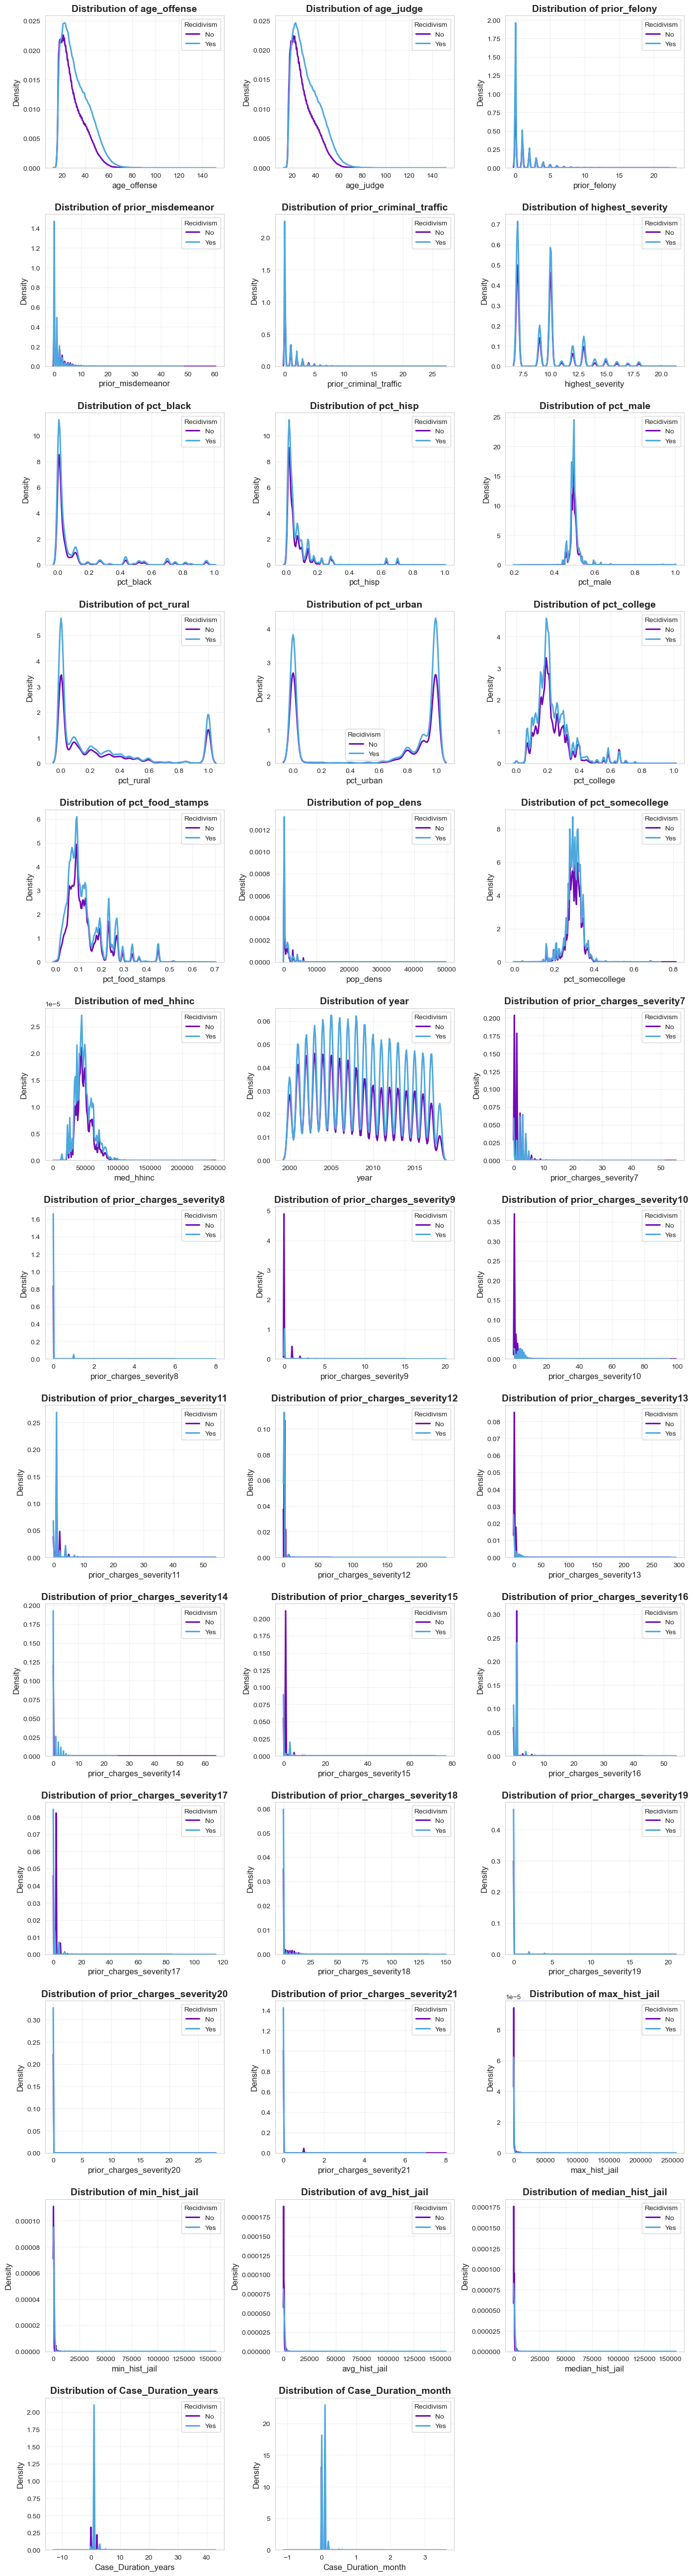

In [ ]:
import math
binary_col = "is_recid_new"  # binary column
df_numeric = df.select_dtypes(include=['float64']).drop(columns=['ID','new_id'], errors='ignore')
sns.set_style("whitegrid")
palette_colors = ['#4ea8de', '#7209b7']
cols = 3
rows = math.ceil(len(df_numeric.columns) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()
for i, col in enumerate(df_numeric.columns):
    sns.kdeplot(
        data=df,
        x=col,
        hue=binary_col,
        palette=palette_colors,
        linewidth=2.2,
        bw_adjust=0.7,
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Density", fontsize=12)
    axes[i].legend(title="Recidivism", labels=["No", "Yes"], fontsize=10)
    axes[i].grid(alpha=0.3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### Overall Distribution of Numeric Features

This histogram grid presents the overall distribution of all numeric variables in the dataset.  
It provides a quick visual summary of variable shapes, skewness, and potential outliers  
to better understand the general data structure before modeling.

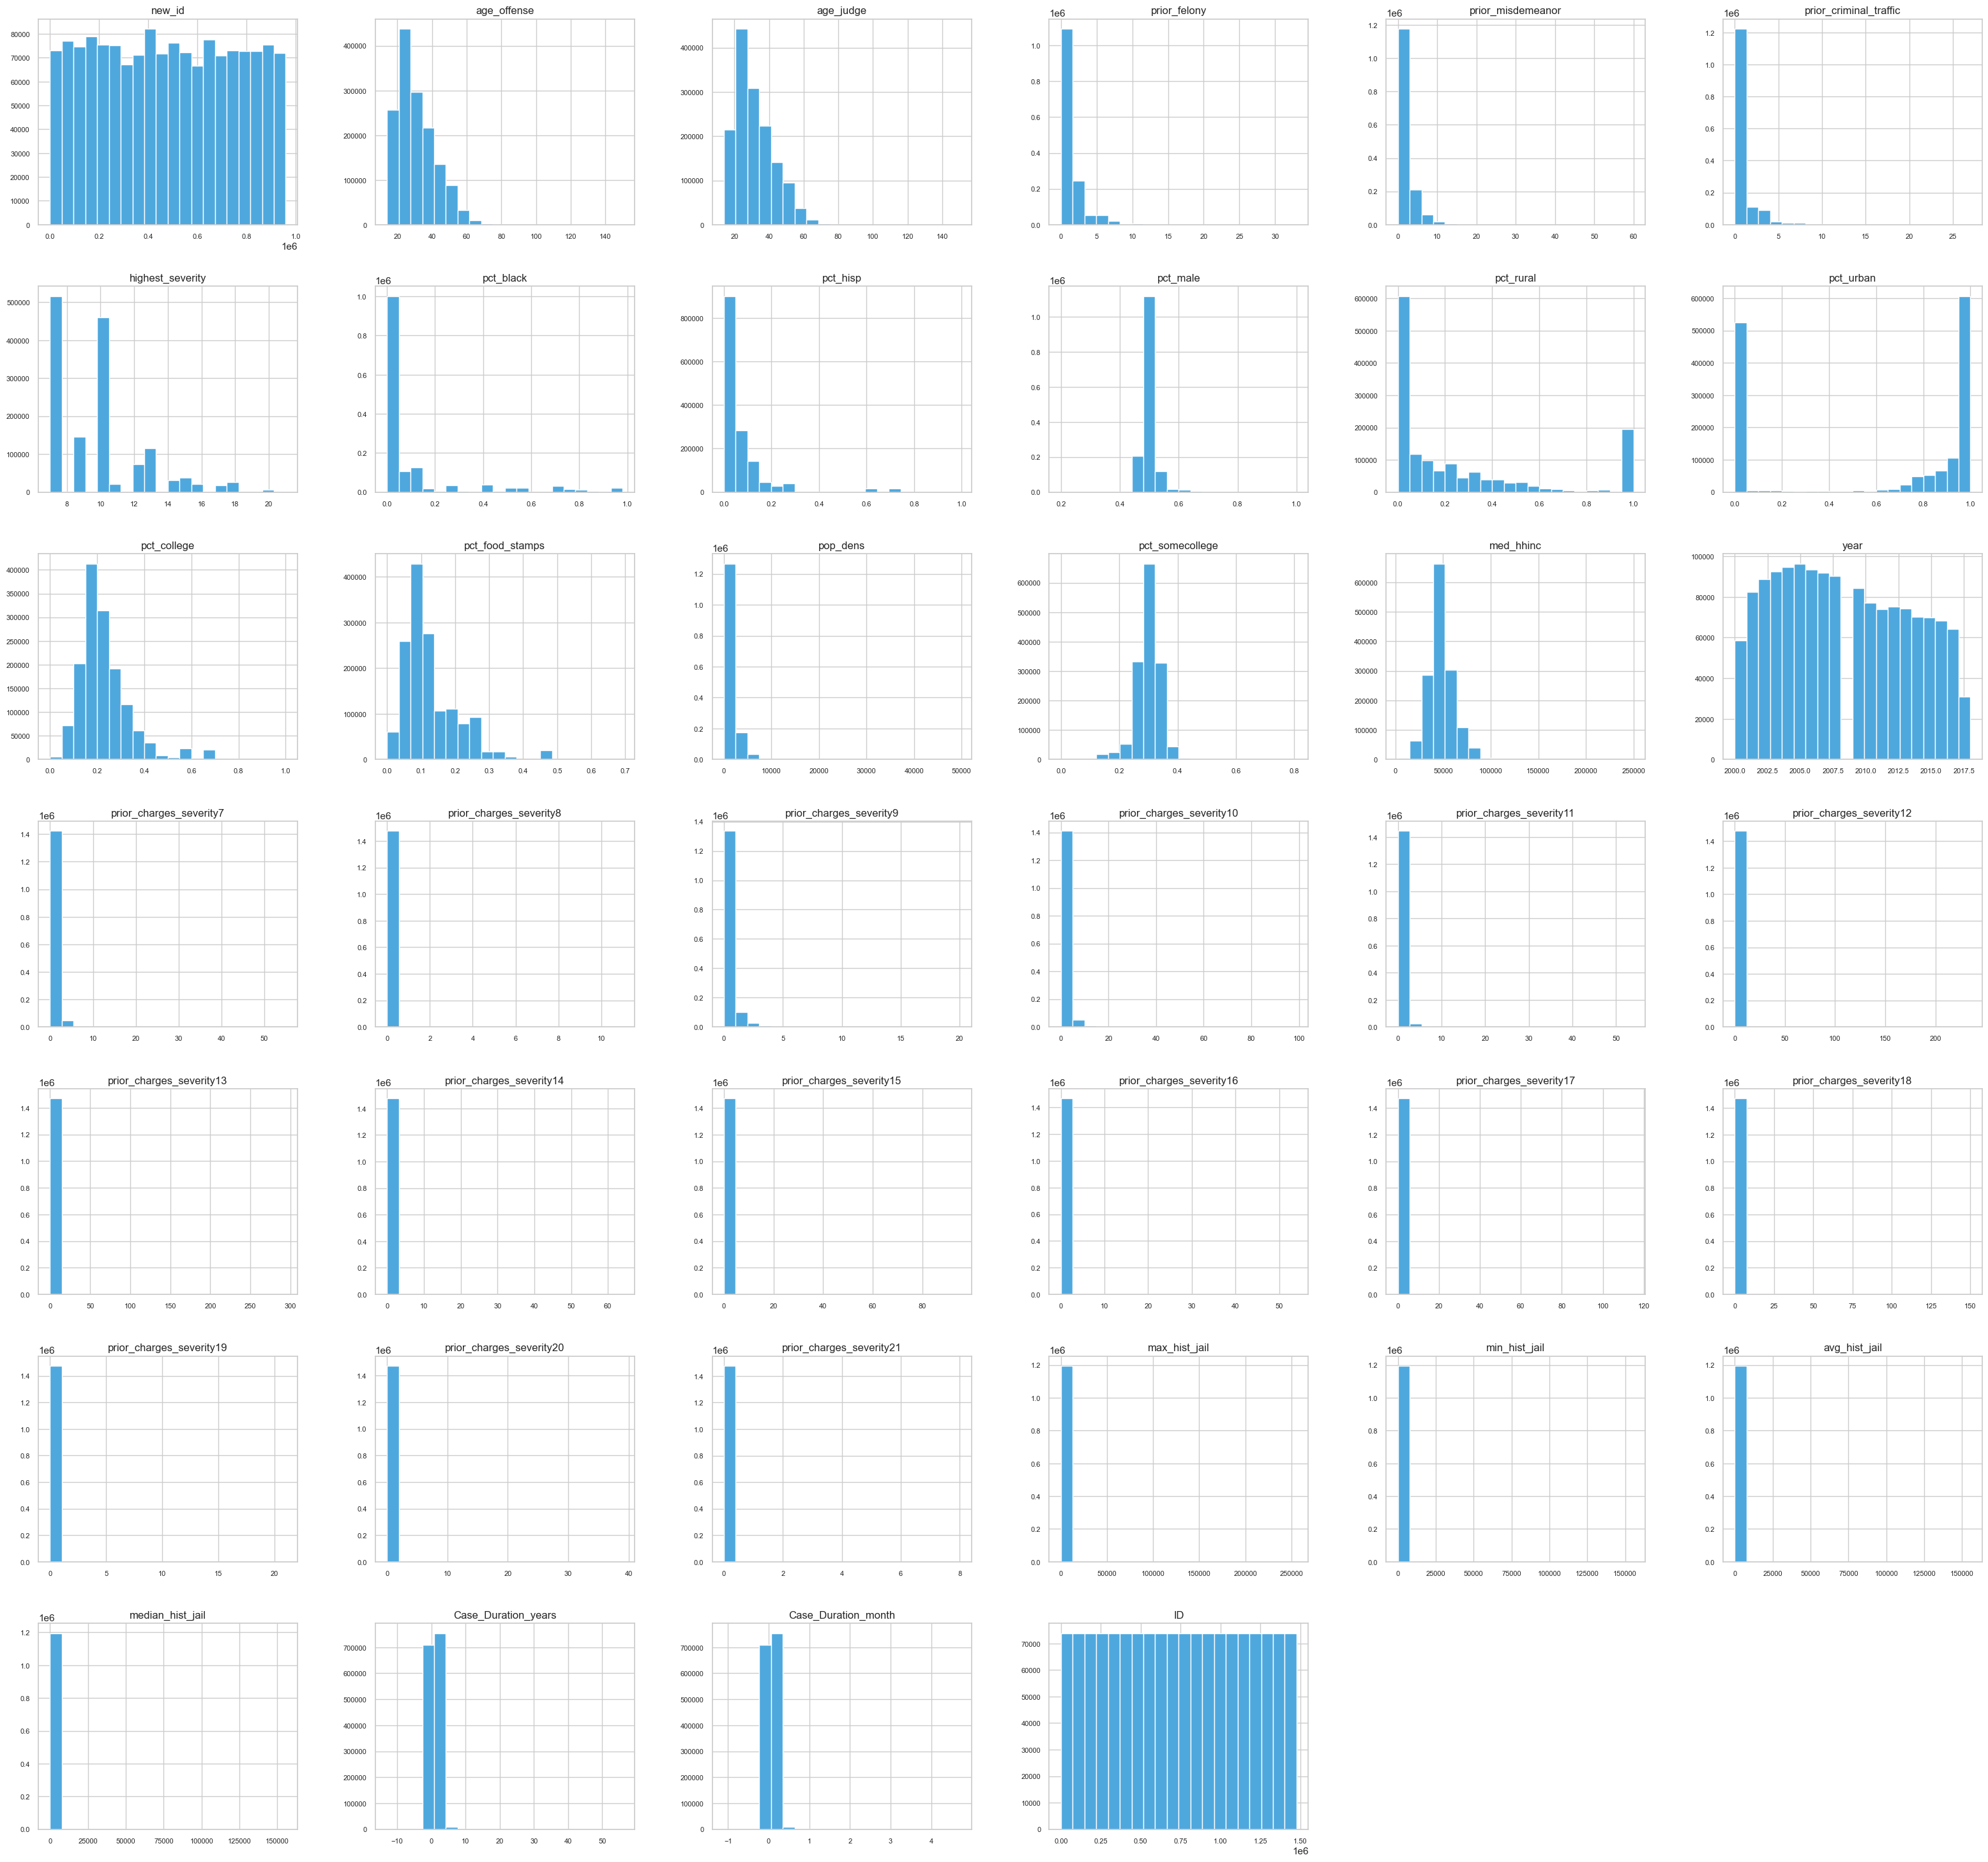

In [ ]:
df_numeric=df.select_dtypes(include='float64')
df_numeric.hist(figsize=(35, 35), bins=20, xlabelsize=8, ylabelsize=8, color = "#4ea8de");

In [ ]:
#skewness for every numeric feature
def highlight(cell_value):
    highlight = 'background-color: skyblue;'
    negative = 'background-color: hotpink;'
    default = ''
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    else:
        return default

pd.DataFrame(df[integer_col].skew(), columns=['skewness']) \
  .sort_values(by='skewness', ascending=False) \
  .style.applymap(highlight)

### Distribution of Binary Variables

This visualization presents the distribution of key binary features —  
**sex**, **release**, and **probation**.  
Each subplot shows the count of values `0` and `1` for the respective variable,  
allowing quick comparison of category balance and potential class imbalance  
among the binary attributes in the dataset.

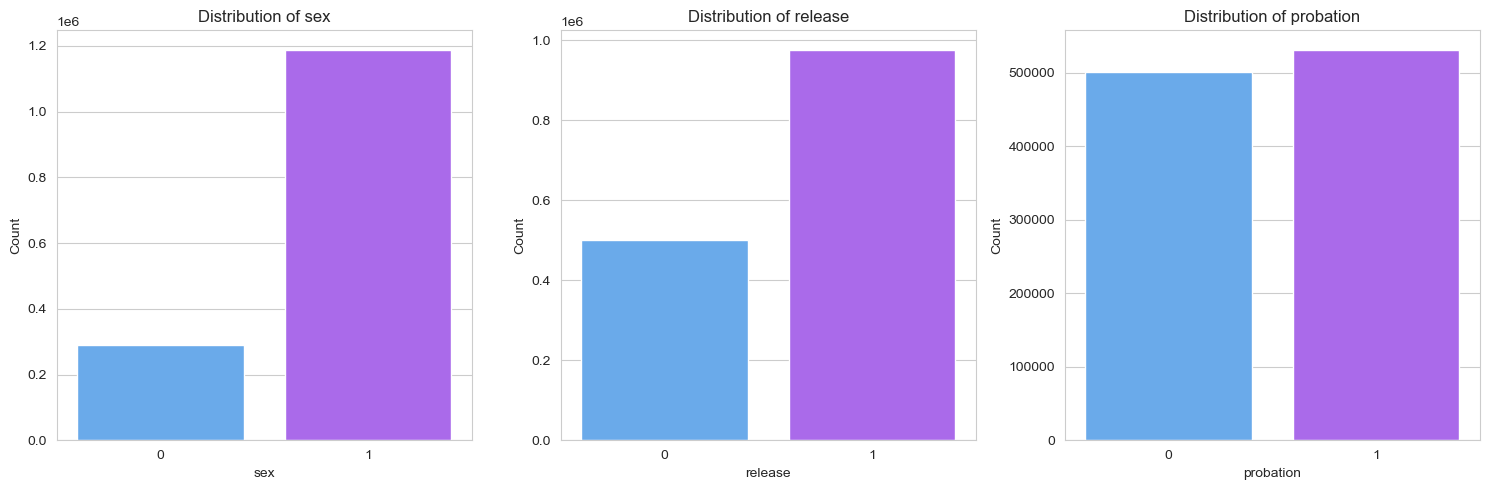

In [ ]:
dummy_col=['sex','release','probation']  # binary columns
df_dummy=df[dummy_col]
def plot_binary_columns(df):
    n_cols = 3
    n_rows = (len(df.columns) + n_cols - 1) // n_cols
    plt.figure(figsize=(15, 5 * n_rows))
    for i, col in enumerate(df.columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.color_palette("viridis", as_cmap=True)
        sns.countplot(data=df, x=col, palette='cool')
        plt.title(f"Distribution of {col}", fontsize=12)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks([0, 1], ['0', '1'])

    plt.tight_layout()
    plt.show()
plot_binary_columns(df_dummy)

### Distribution of Categorical Variables

The following bar plots display the frequency of each category  
for all main categorical features — **race**, **case_type**, **wcisclass**, and **all_races**.  
Each plot highlights category dominance, class imbalance, and potential skewness in representation.  
Value labels are added above each bar for clarity, helping to interpret how different categories  
contribute to the overall dataset composition.

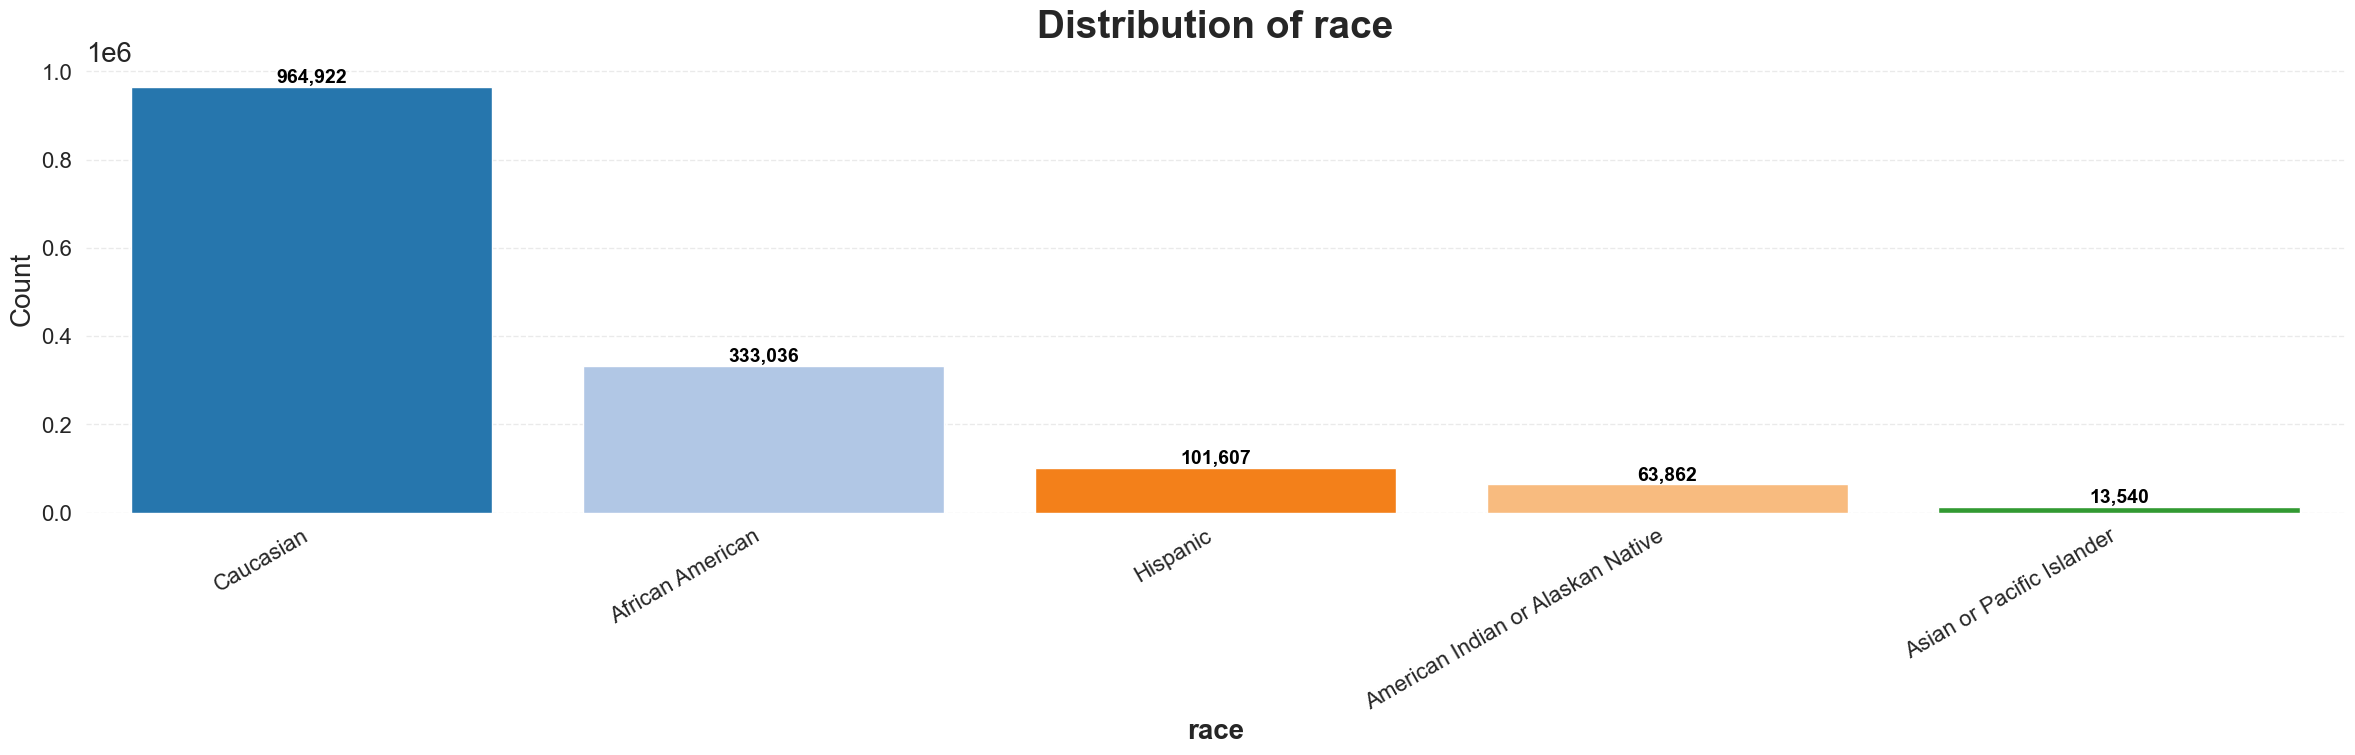

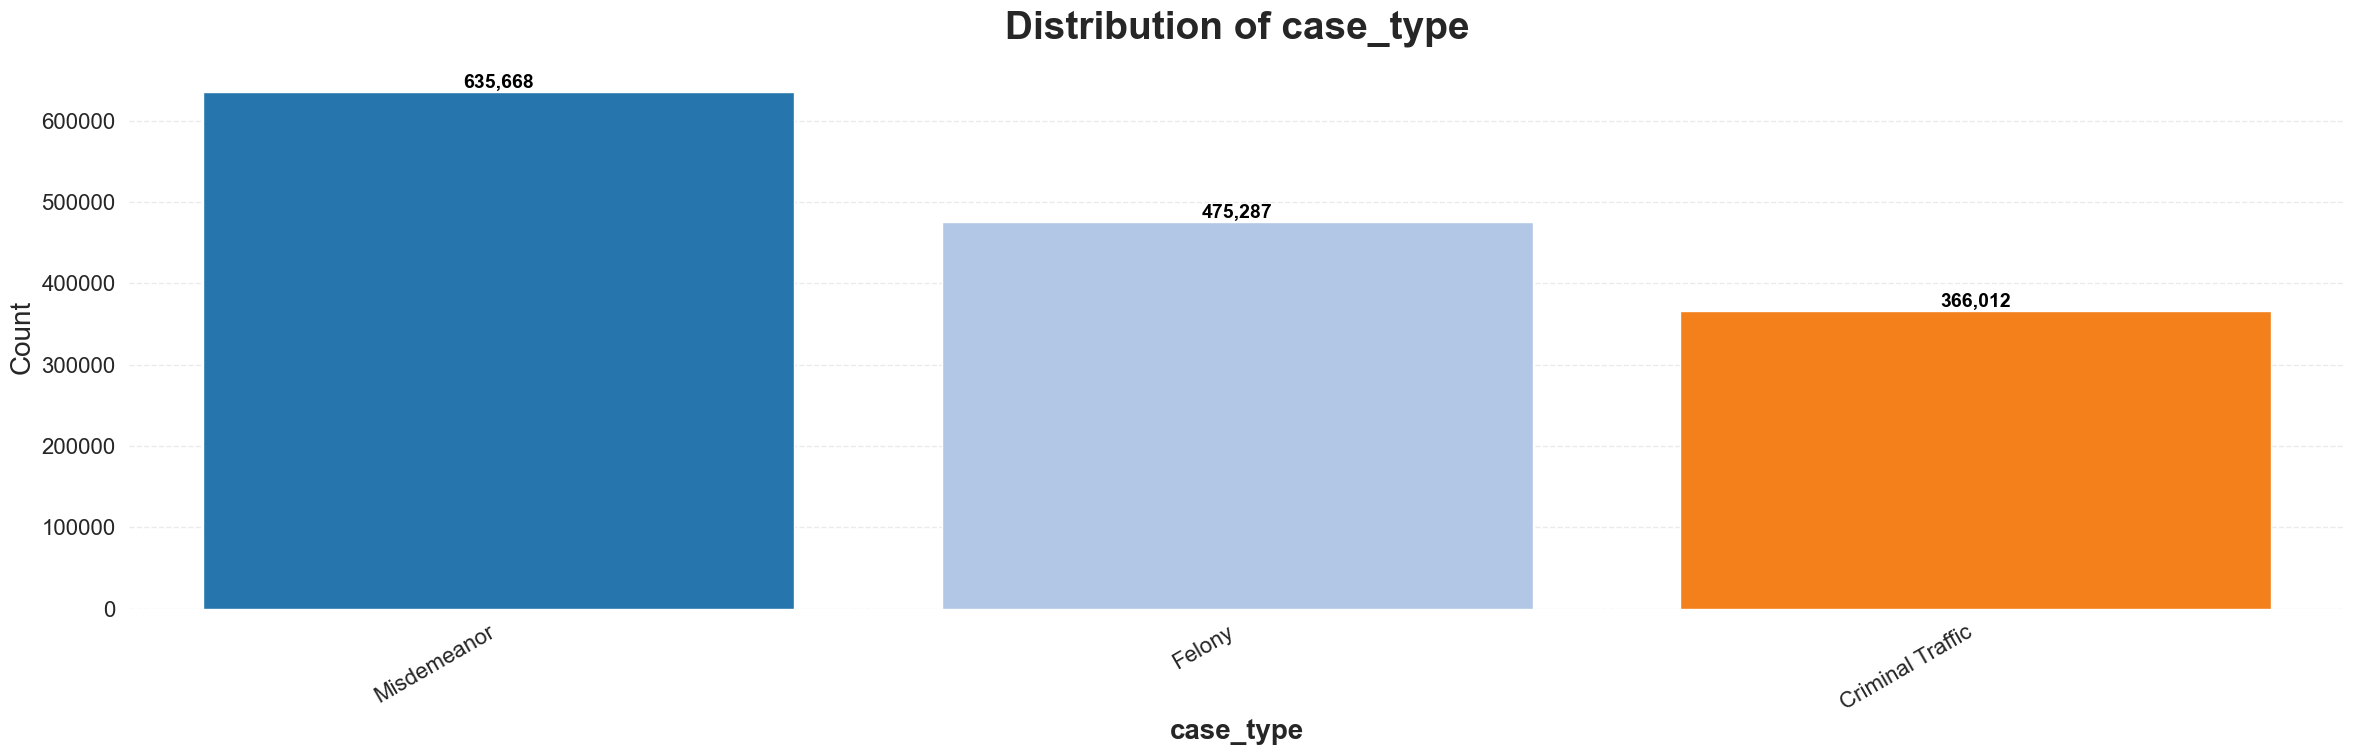

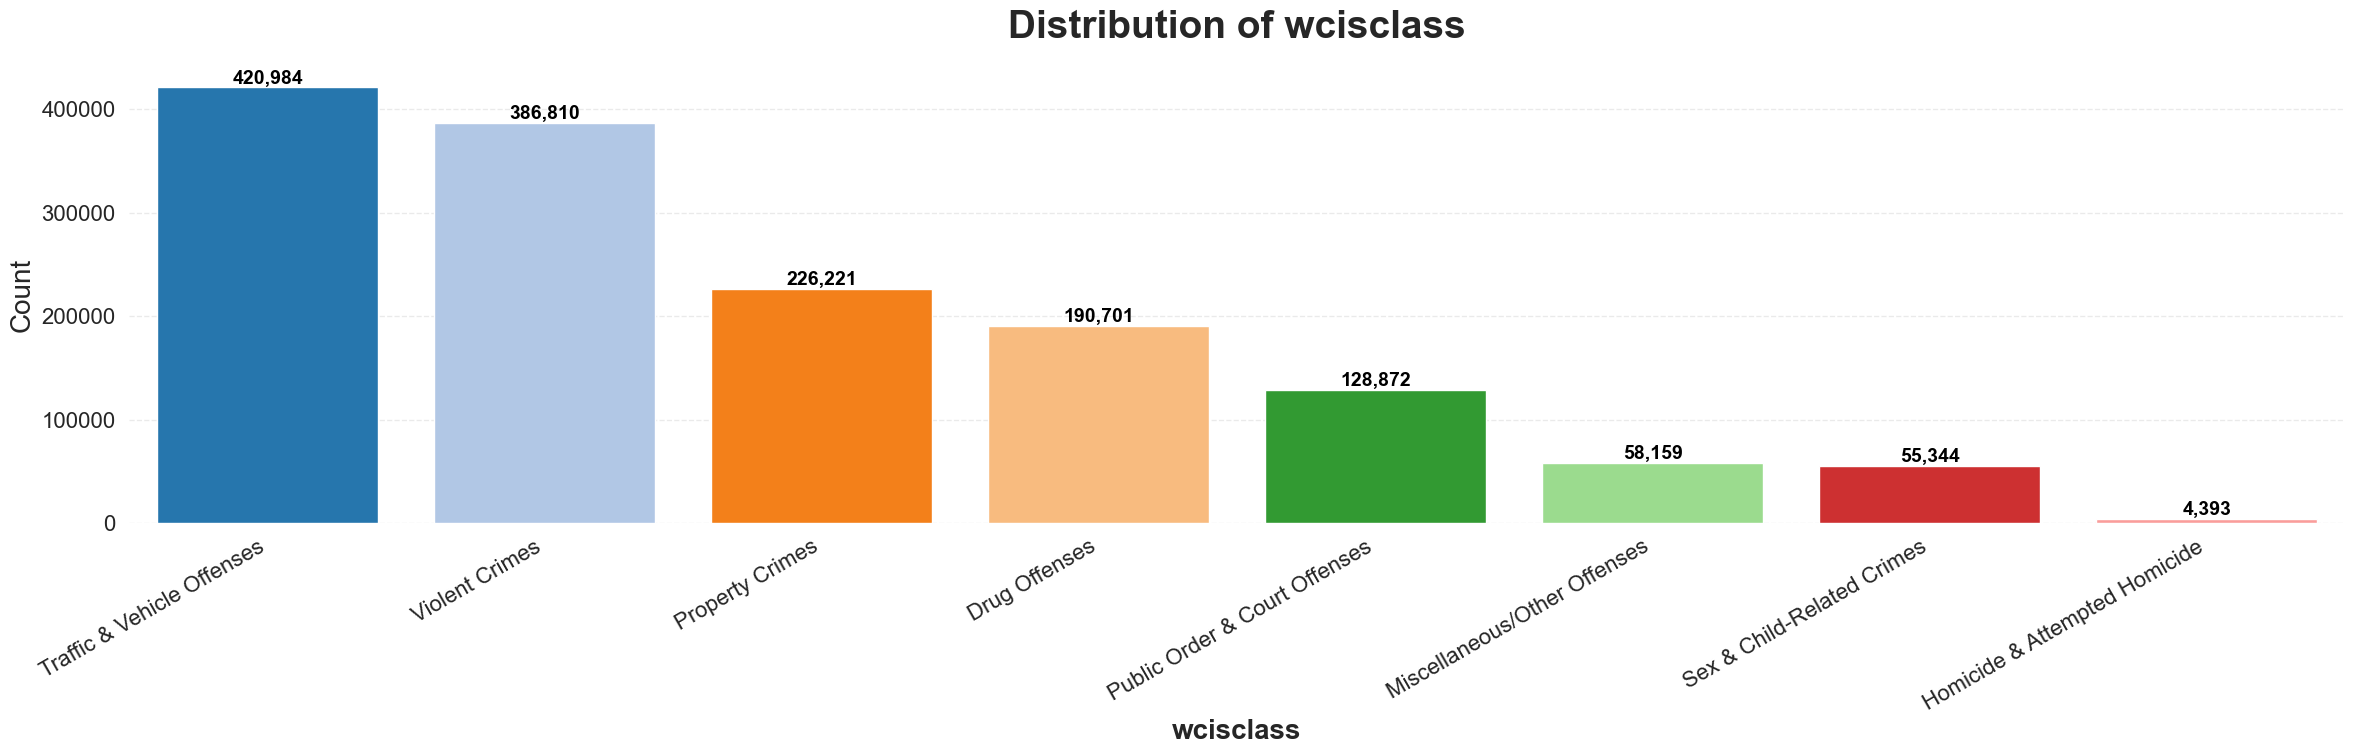

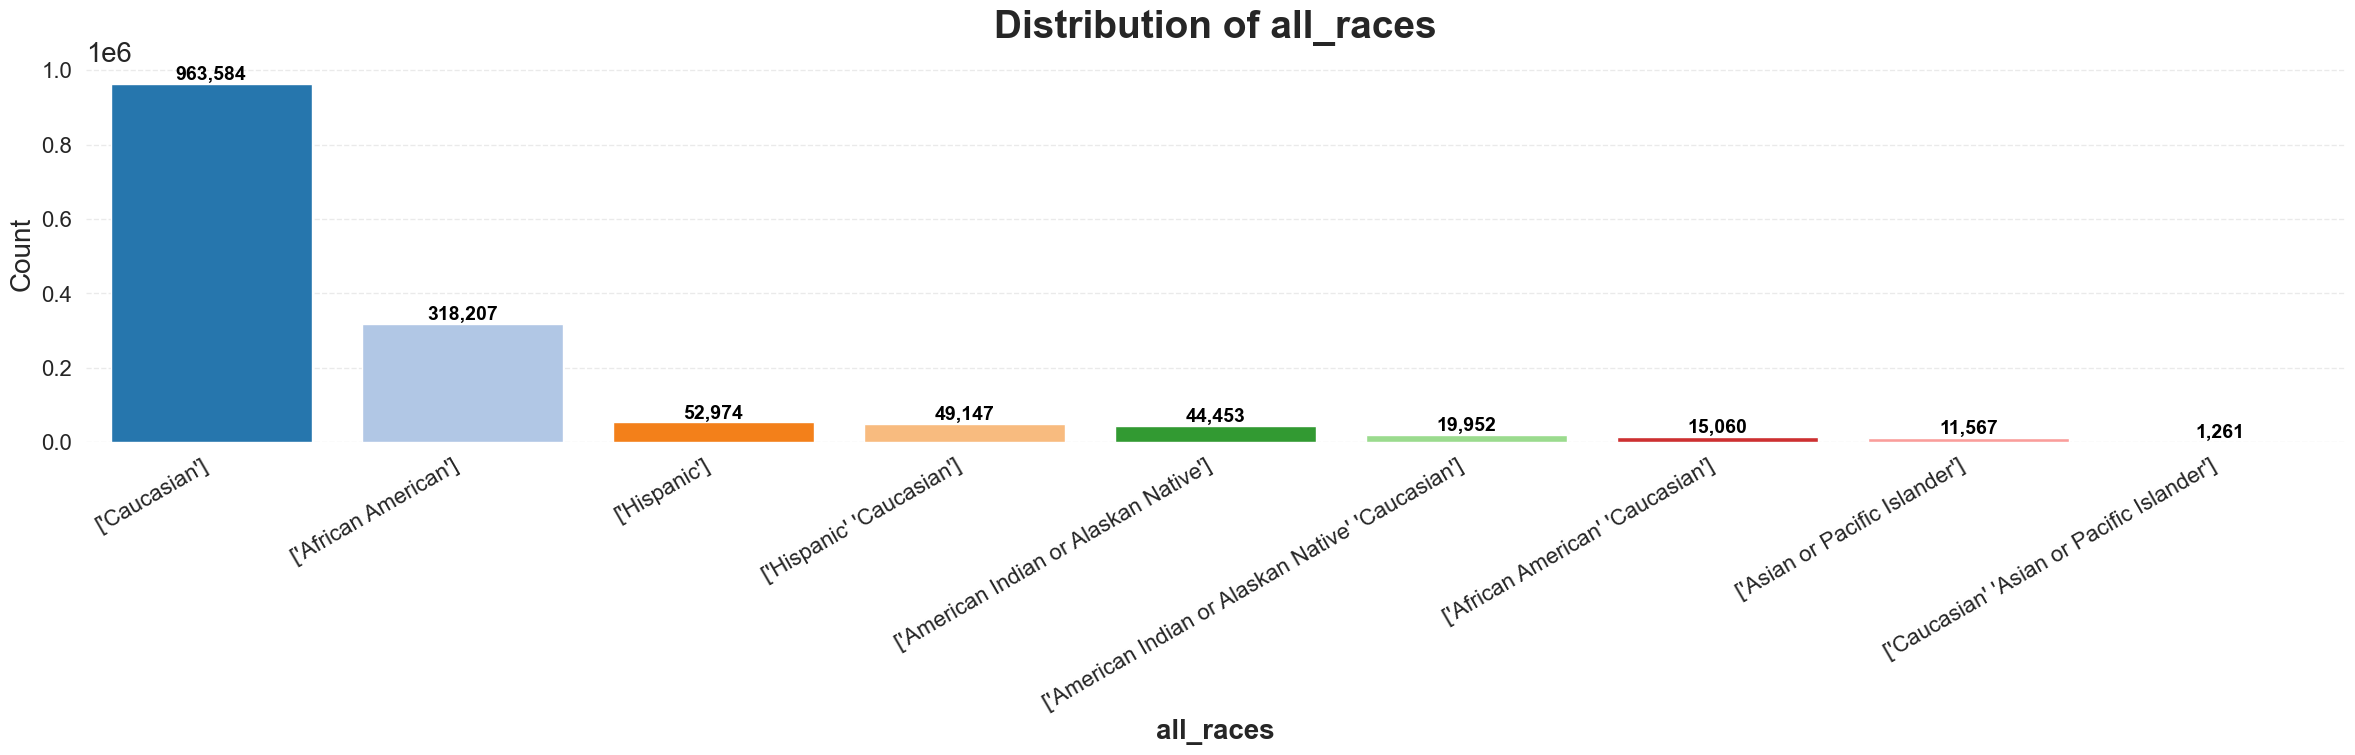

In [ ]:
cat_col = ['race', 'case_type', 'wcisclass', 'county_name','all_races']
df_cat = df[cat_col]
df_cat=df_cat.drop(columns='county_name')
# עיצוב כללי
sns.set_theme(style="whitegrid", font_scale=1.8)
palette = sns.color_palette("tab20")

for col in df_cat.columns:
    plt.figure(figsize=(24, 8))
    order = df_cat[col].value_counts().index
    ax = sns.countplot(x=col, data=df_cat, order=order, palette=palette, saturation=0.9)

    plt.title(f"Distribution of {col}", fontsize=28, weight='bold', pad=20)
    plt.xlabel(col, fontsize=20, weight='bold')
    plt.ylabel("Count", fontsize=20)
    plt.xticks(rotation=30, ha='right', fontsize=16)
    plt.yticks(fontsize=16)

    sns.despine(left=True, bottom=True)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height()):,}',
            (p.get_x() + p.get_width()/2., p.get_height()),
            ha='center', va='bottom',
            fontsize=14, fontweight='bold', color='black'
        )

    plt.tight_layout()
    plt.show()

### Distribution of county

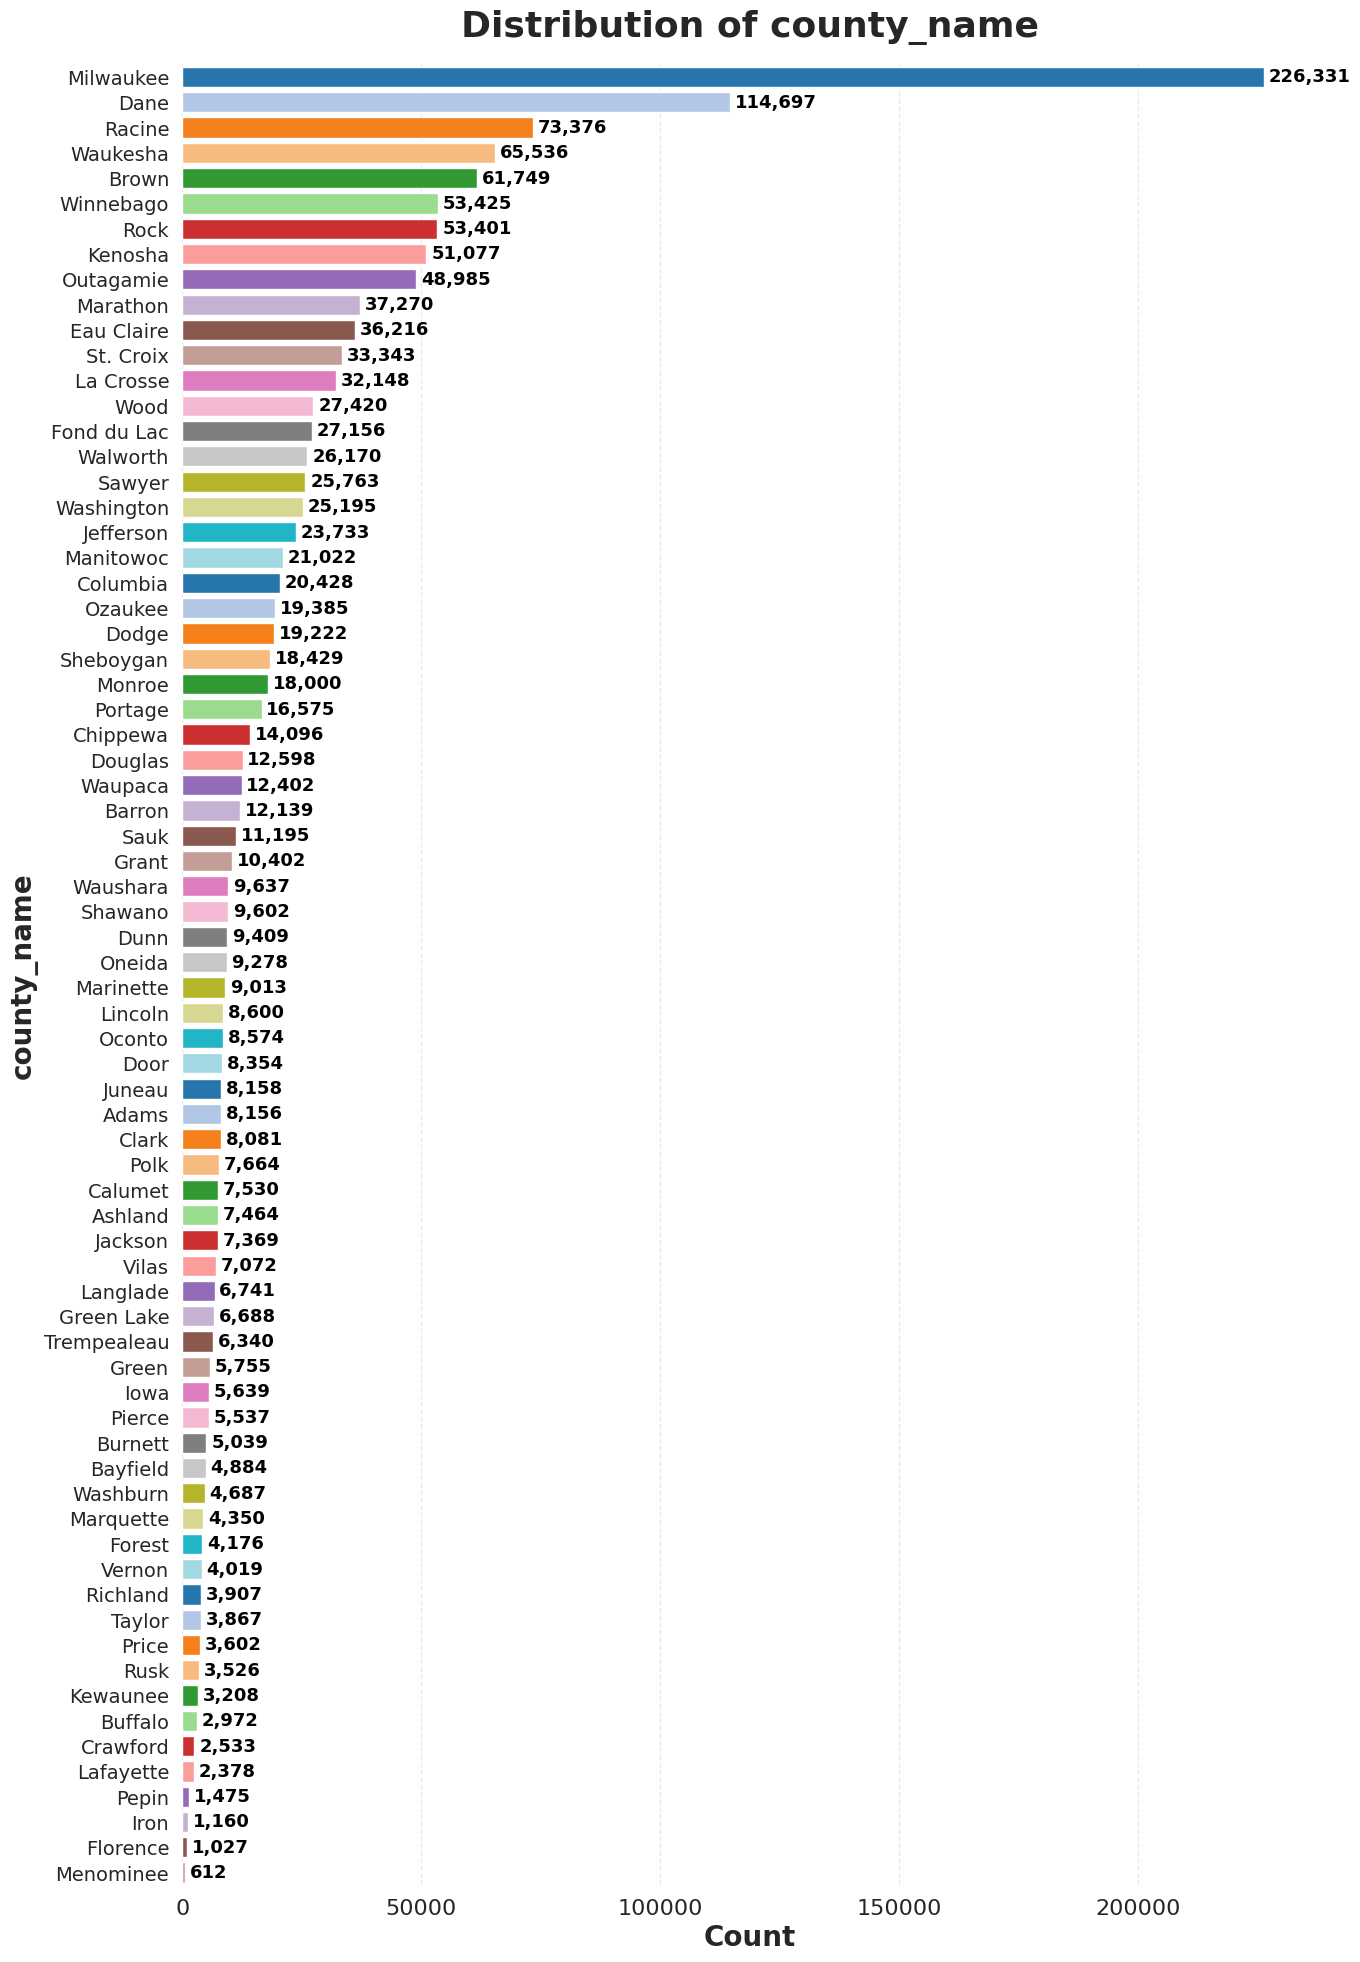

In [ ]:
col = "county_name"
plt.figure(figsize=(14, 20))
sns.set_theme(style="whitegrid", font_scale=1.6)
palette = sns.color_palette("tab20")
order = df[col].value_counts().index
ax = sns.countplot(
    y=col,
    data=df,
    order=order,
    palette=palette,
    saturation=0.9
)
plt.title(f"Distribution of {col}", fontsize=26, weight='bold', pad=20)
plt.ylabel(col, fontsize=20, weight='bold')
plt.xlabel("Count", fontsize=20, weight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
sns.despine(left=True, bottom=True)
ax.grid(axis='x', linestyle='--', alpha=0.4)
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width):,}',
        (width + 1000, p.get_y() + p.get_height() / 2),
        ha='left',
        va='center',
        fontsize=13,
        fontweight='bold',
        color='black'
    )
plt.tight_layout()
plt.show()

#### Target Variables

The dataset includes three target variables related to recidivism outcomes:

- **is_recid_now** – indicates whether an individual recid in two years from his end of prison term-target value .  
- **recid_180d** – indicates whether an individual was less or 180 days in prison and recided in two years from his end of prison .  
- **recid_180d_violent** – indicates whether recid after less or 180 days and recid to violnet.

These targets allow modeling both general and short-term recidivism,  
as well as distinguishing between violent and non-violent reoffending patterns.

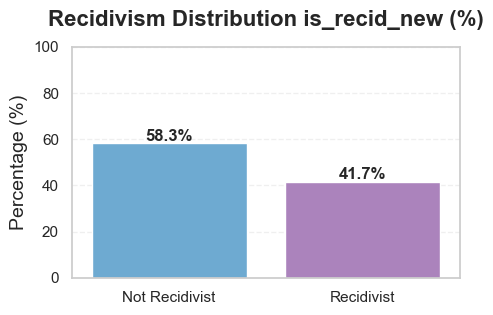

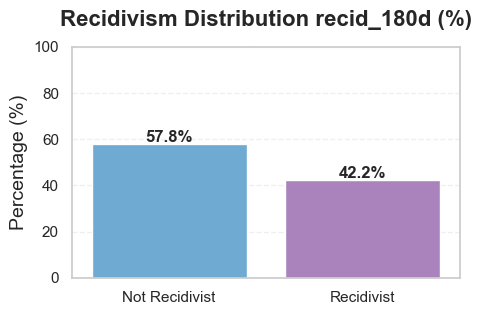

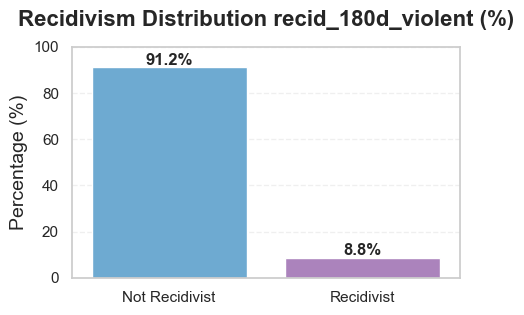

In [ ]:
target_col=['is_recid_new','recid_180d','recid_180d_violent']
for col in target_col:
    percentages = df[col].value_counts(normalize=True) * 100
    plot_df = pd.DataFrame({
        'Recidivism': percentages.index.map({0: 'Not Recidivist', 1: 'Recidivist'}),
        'Percentage': percentages.values
    })
    plt.figure(figsize=(5,3))
    sns.barplot(data=plot_df, x='Recidivism', y='Percentage', palette=['#5DADE2','#AF7AC5'])
    for index, row in plot_df.iterrows():
        plt.text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%", ha='center', fontsize=12, weight='bold')
    plt.title(f"Recidivism Distribution {col} (%)", fontsize=16, weight='bold', pad=15)
    plt.ylabel("Percentage (%)", fontsize=14)
    plt.xlabel("")
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()

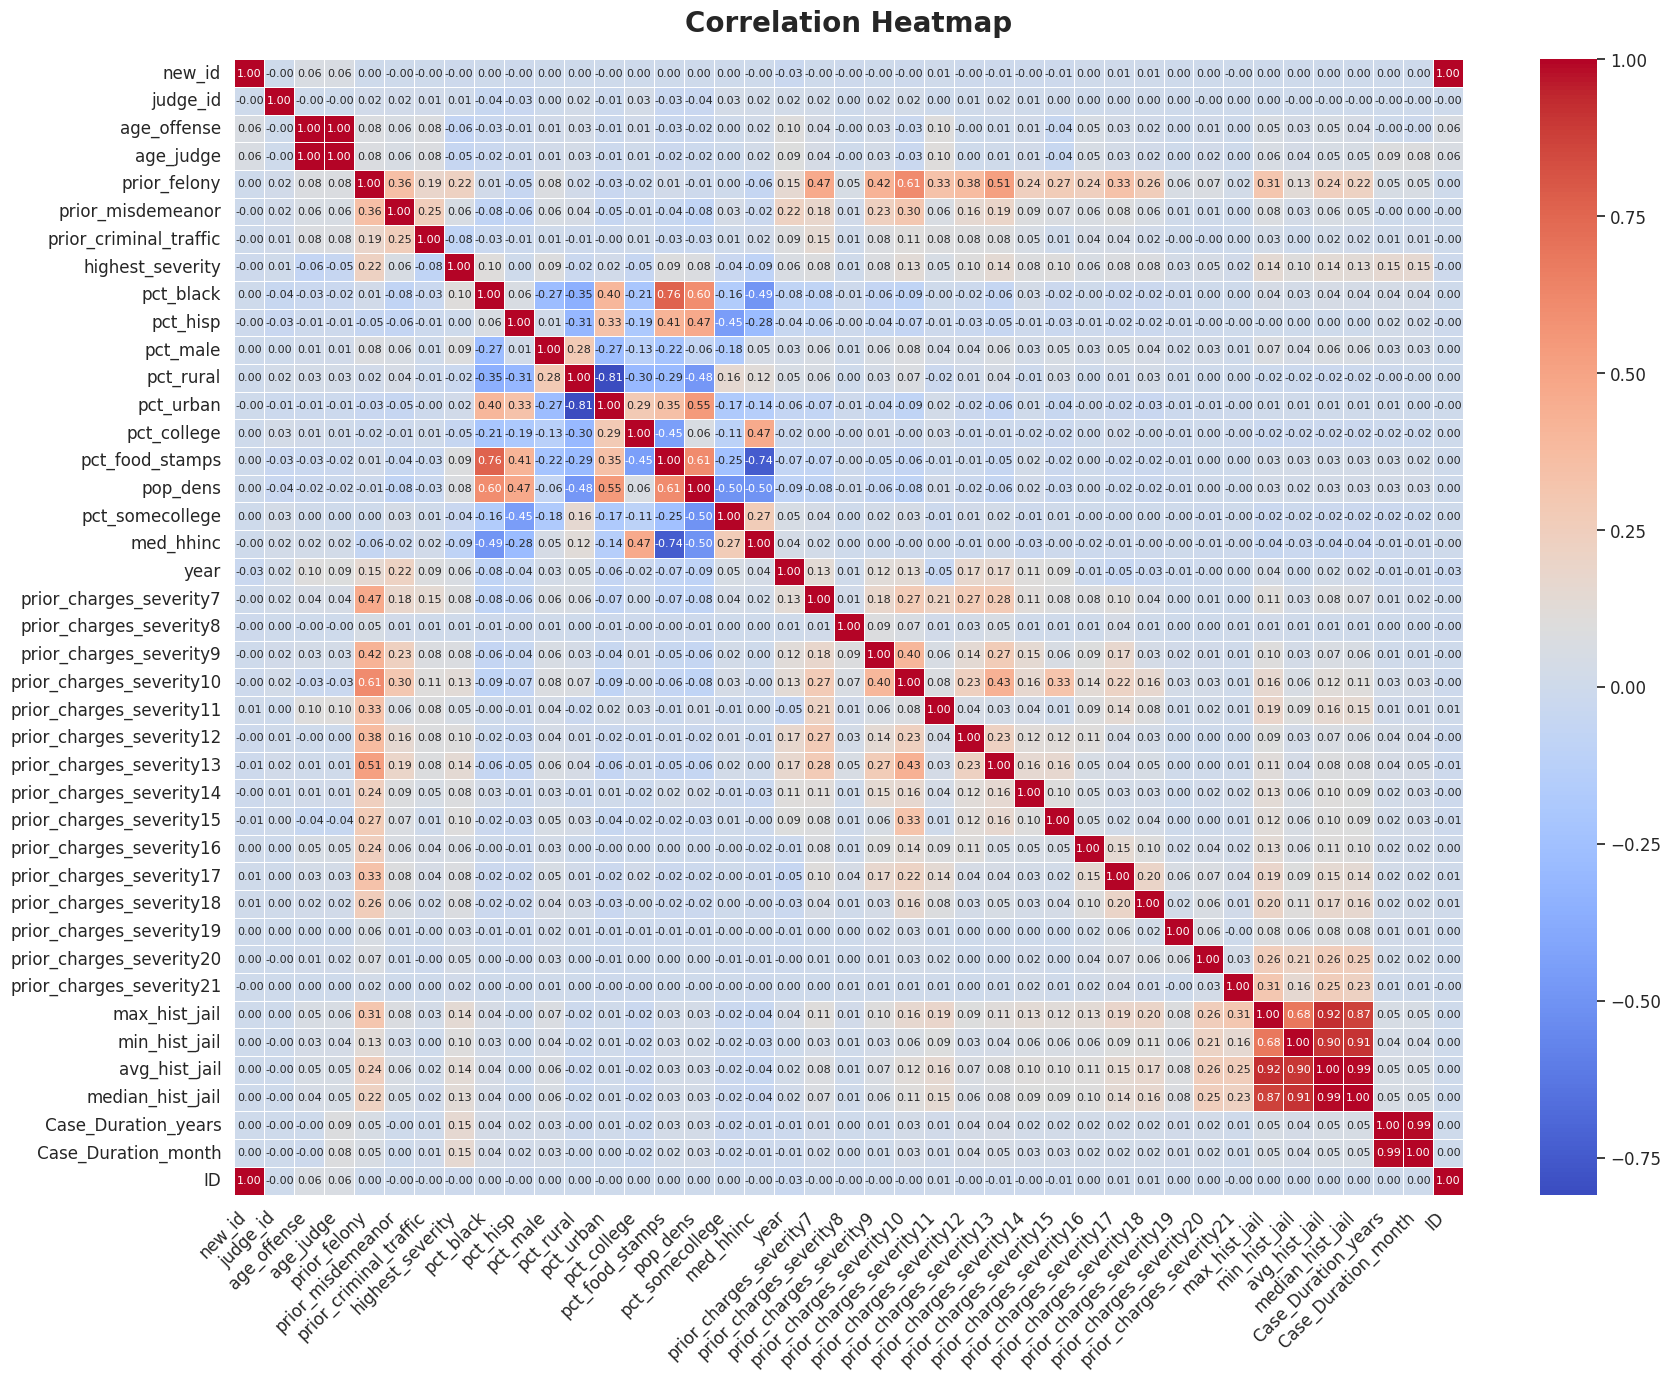

In [ ]:
#corrolation map
plt.figure(figsize=(18, 14))
sns.set(font_scale=1.1)
corr =df.select_dtypes(include='float64').corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 8}
)
plt.title("Correlation Heatmap", fontsize=20, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#

In [ ]:
#!pip install scipy
import scipy.stats as stats
from scipy.stats import chisquare

In [ ]:
#split ths data into main groups recividism / None
recid_group=df[df.is_recid_new==1]
non_recid_group=df[df.is_recid_new==0]

### T-Test for Significance

A t-test was conducted to evaluate whether the differences between groups are statistically significant.  
Since the full dataset includes over one million records, even minor variations can appear significant.  
To address this, a smaller sample was tested as well — and except for two variables,  
the results were consistent across both the sample and the full dataset.


In [ ]:
df_sample=df.sample(frac=0.05, random_state=42) #5% of the data
recid_sample=df_sample[df_sample.is_recid_new==1]
non_recid_sample=df_sample[df_sample.is_recid_new==0]

# Recidivism VS Non Recidivism - age

In [ ]:
df['is_recid_new'] = df['is_recid_new'].astype(float)
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['age_offense'], bins=bins, labels=labels, right=False)
age_stats = (
    df.groupby('age_group')['is_recid_new'].mean().reset_index().rename(columns={'is_recid_new': 'Recidivism_Rate'})
)
age_stats['Recidivism_Rate']*=100
print(age_stats)
print("conclusion:teenager have 50% to recidivism")

  age_group  Recidivism_Rate
0       <20        51.585424
1     20-30        45.113155
2     30-40        39.652119
3     40-50        34.758531
4     50-60        26.487463
5       60+        17.419208
conclusion:teenager have 50% to recidivism


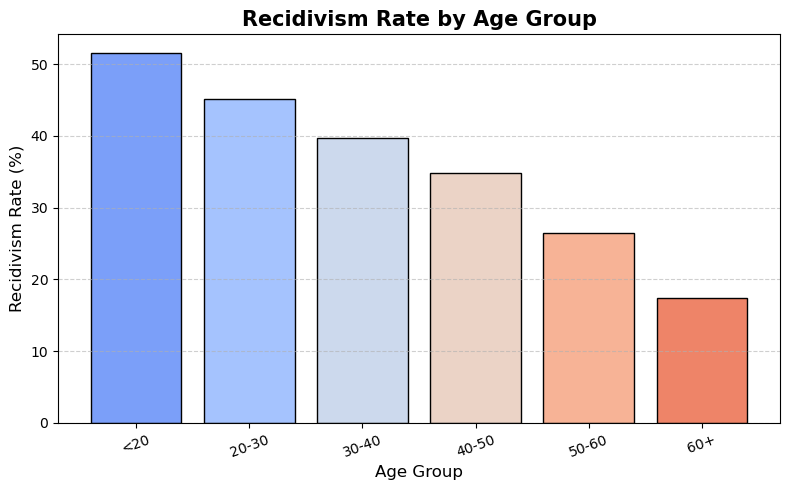

In [ ]:
# plot to show which age recidivism rate is highest
plt.figure(figsize=(8,5))
colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(age_stats)))
plt.bar(age_stats['age_group'], age_stats['Recidivism_Rate'],
        color=colors, edgecolor='black', linewidth=1)
plt.title('Recidivism Rate by Age Group', fontsize=15, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Recidivism Rate (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

T-statistic: -169.26529199400935
P-value: 0.0


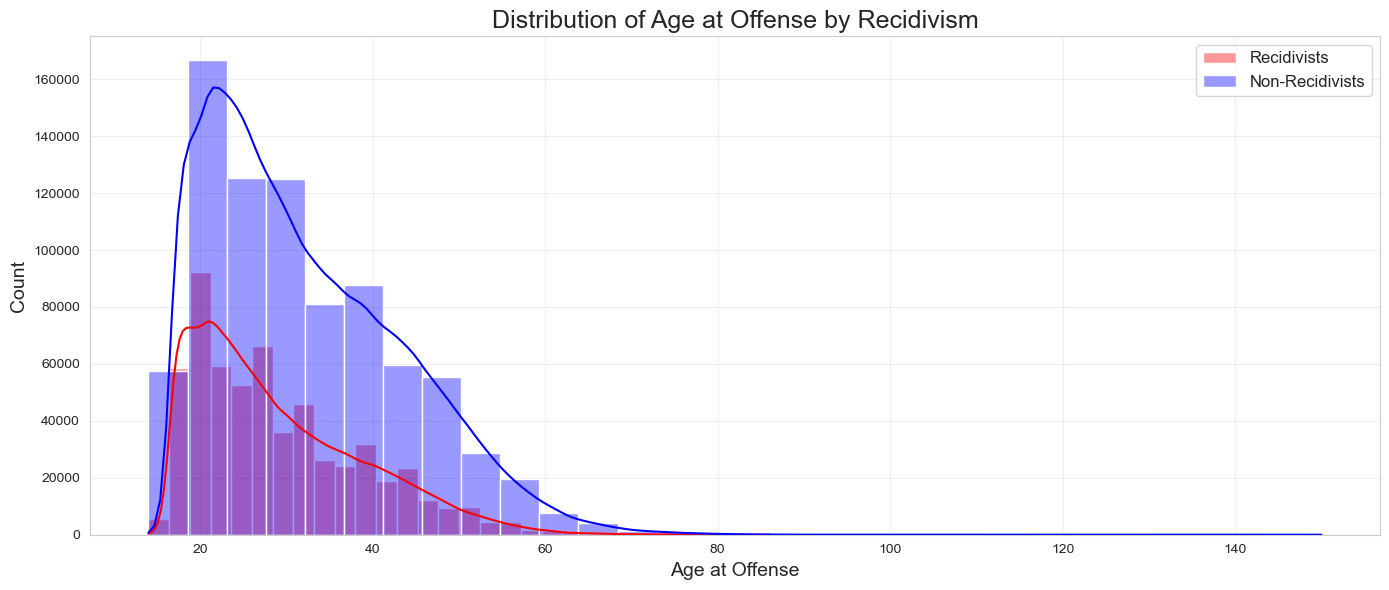

---------- sample---------
T-statistic sample: -39.612071504596294
P-value sampl: 0.0


In [ ]:
#check the different of distrobution of age_offense is there a statistically significant difference?
age_recid=recid_group['age_offense']
age_non_recid=non_recid_group['age_offense']
t_stat, p_value = stats.ttest_ind(age_recid, age_non_recid) #ttest all data
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
#plot to show the distribution of age
plt.figure(figsize=(14, 6))
sns.histplot(age_recid, bins=30, kde=True, color='red', label='Recidivists',
             alpha=0.4, stat='count')
sns.histplot(age_non_recid, bins=30, kde=True, color='blue', label='Non-Recidivists',
             alpha=0.4, stat='count')
plt.title('Distribution of Age at Offense by Recidivism', fontsize=18)
plt.xlabel('Age at Offense', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("---------- sample---------") #ttest sample
age_recid=recid_sample['age_offense']
age_non_recid=non_recid_sample['age_offense']
t_stat, p_value = stats.ttest_ind(age_recid, age_non_recid)
print(f'T-statistic sample: {t_stat}')
print(f'P-value sampl: {p_value}')


###  Age Distribution by Recidivism

Although the visual overlap is large,  
the statistical test confirms that **recidivists tend to be younger on average**  
at the time of their offense.  

The difference is **subtle but statistically significant**,  
indicating that **age plays a measurable role** in the likelihood of reoffending.  

This suggests that **younger offenders** have a higher probability  
of recidivism compared to older individuals.

In [ ]:
#introducing what is the most common offense for every group age
crime_by_age = (
    df.groupby(['age_group', 'wcisclass'])
      .size()
      .reset_index(name='Count')
)
crime_by_age['Percent'] = (
    crime_by_age.groupby('age_group')['Count']
    .apply(lambda x: 100 * x / x.sum())
    .reset_index(drop=True)
)
top3_crimes = (
    crime_by_age.sort_values(['age_group', 'Percent'], ascending=[True, False])
    .groupby('age_group')
    .head(8)
    .reset_index(drop=True)
)
print(top3_crimes)

   age_group                      wcisclass   Count    Percent
0        <20                 Violent Crimes   53255  27.865567
1        <20                Property Crimes   46758  24.466026
2        <20                  Drug Offenses   32576  17.045324
3        <20     Traffic & Vehicle Offenses   24075  12.597193
4        <20  Public Order & Court Offenses   15978   8.360455
5        <20     Sex & Child-Related Crimes    9535   4.989169
6        <20   Miscellaneous/Other Offenses    8107   4.241971
7        <20  Homicide & Attempted Homicide     830   0.434296
8      20-30     Traffic & Vehicle Offenses  173594  29.030845
9      20-30                 Violent Crimes  157649  26.364296
10     20-30                  Drug Offenses   86744  14.506559
11     20-30                Property Crimes   85704  14.332635
12     20-30  Public Order & Court Offenses   51146   8.553358
13     20-30   Miscellaneous/Other Offenses   22878   3.825983
14     20-30     Sex & Child-Related Crimes   18310   3

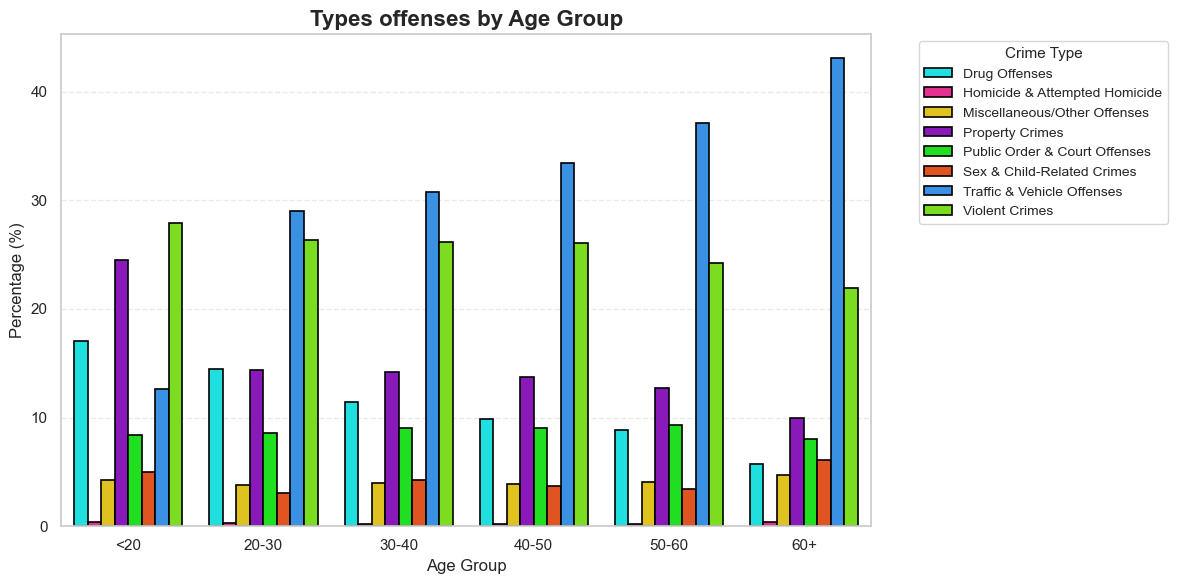

In [ ]:
#graph to show clearly
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
palette = {
    'Drug Offenses': '#00FFFF',        # Cyan / Electric Blue
    'Homicide & Attempted Homicide': '#FF1493',  # Deep Pink
    'Miscellaneous/Other Offenses': '#FFD700',   # Bright Gold
    'Property Crimes': '#9400D3',     # Dark Purple
    'Public Order & Court Offenses': '#00FF00',  # Neon Green
    'Sex & Child-Related Crimes': '#FF4500',     # Vivid Orange-Red
    'Traffic & Vehicle Offenses': '#1E90FF',     # Bright Blue
    'Violent Crimes': '#7CFC00'       # Lime Green
}
sns.barplot(
    data=top3_crimes,
    x='age_group',
    y='Percent',
    hue='wcisclass',
    palette=palette,
    edgecolor='black',
    linewidth=1.2
)
plt.title('Types offenses by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Crime Type', fontsize=10, title_fontsize=11, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Recidivism VS Non Recidivism - sex

In [ ]:
from scipy.stats import chi2_contingency #chi_squre for categories
table = pd.crosstab(df['sex'], df['is_recid_new'])
chi2, p, dof, expected = chi2_contingency(table)
print("Chi-square statistic:", chi2)
print("p-value:", p)


## sample
print("---------- sample---------")
table = pd.crosstab(df_sample['sex'], df_sample['is_recid_new'])
chi2, p, dof, expected = chi2_contingency(table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 6917.787635237151
p-value: 0.0
---------- sample---------
Chi-square statistic: 361.65290642865887
p-value: 1.2293359972186841e-80


In [ ]:
#### there is significant difference between sex and recidivism

In [ ]:
neon_blue_palette = [
    "#00BFFF",  # Electric Blue
    "#1E90FF",  # Dodger Blue
    "#4169E1",  # Royal Blue
    "#8A2BE2",  # Vivid Violet
    "#BA55D3",  # Orchid Purple
    "#FF00FF",  # Magenta Glow
    "#7DF9FF",  # Light Neon Cyan
    "#5F9EA0",  # Soft Teal Blue
]

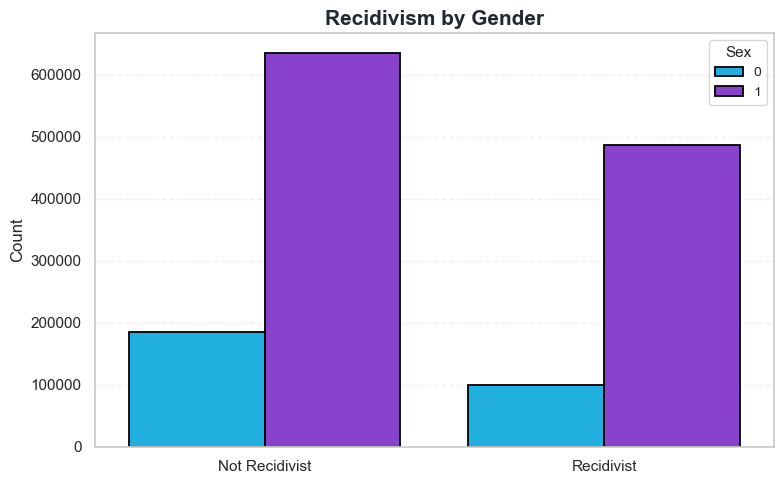

In [ ]:
#graph to show recidivism rate by sex
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")
sns.barplot(
    data=table_melted,
    x='Recidivism',
    y='Count',
    hue='sex',
    palette=[neon_blue_palette[0], neon_blue_palette[3]],  # Electric Blue vs Vivid Violet
    edgecolor='black',
    linewidth=1.3
)
plt.title('Recidivism by Gender', fontsize=15, fontweight='bold', color='#222831')
plt.xlabel("")
plt.ylabel("Count", fontsize=12)
plt.legend(title='Sex', fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Count crimes per gender and crime type
gender_crime = (
    df.groupby(['sex', 'wcisclass'])
      .size()
      .reset_index(name='Count')
)
# Calculate percentage within each gender
gender_crime['Percent'] = (
    gender_crime.groupby('sex')['Count']
    .apply(lambda x: 100 * x / x.sum())
    .reset_index(drop=True)
)
top_gender_crimes = (
    gender_crime.sort_values(['sex', 'Percent'], ascending=[True, False])
    .groupby('sex')
    .head(16)
    .reset_index(drop=True)
)
print(top_gender_crimes)

   sex           wcisclass              Count  Percent
0    0     Traffic & Vehicle Offenses   76222  26.40  
1    0                 Violent Crimes   66259  22.95  
2    0                Property Crimes   65228  22.59  
3    0                  Drug Offenses   35980  12.46  
4    0  Public Order & Court Offenses   24344   8.43  
5    0   Miscellaneous/Other Offenses   10166   3.52  
6    0     Sex & Child-Related Crimes    9947   3.44  
7    0  Homicide & Attempted Homicide     599   0.21  
8    1     Traffic & Vehicle Offenses  344762  29.15  
9    1                 Violent Crimes  320551  27.10  
10   1                Property Crimes  160993  13.61  
11   1                  Drug Offenses  154721  13.08  
12   1  Public Order & Court Offenses  104528   8.84  
13   1   Miscellaneous/Other Offenses   47993   4.06  
14   1     Sex & Child-Related Crimes   45397   3.84  
15   1  Homicide & Attempted Homicide    3794   0.32  


<Figure size 1200x600 with 0 Axes>

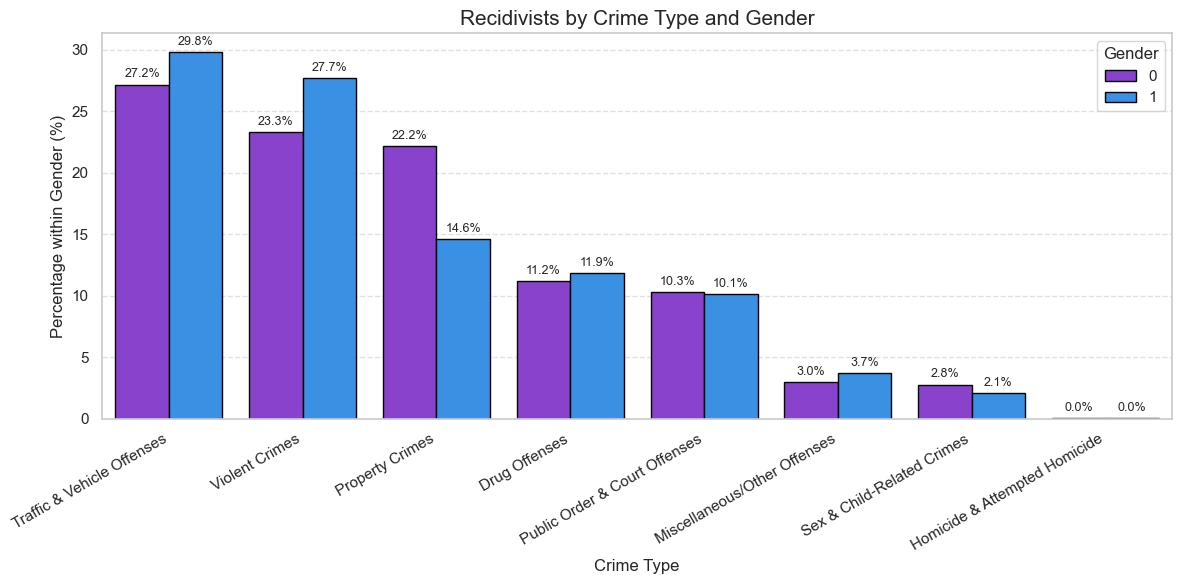

In [ ]:
plt.figure(figsize=(12,6))

# Countplot-like bar chart with percentages
order = recid_group['wcisclass'].value_counts().index
plt.figure(figsize=(12,6))

# Custom colors: purple (for females) and blue (for males)

custom_palette = ["#8A2BE2", "#1E90FF"]  # purple, blue
sns.barplot(
    data=recid_gender,
    x='wcisclass',
    y='Percent',
    hue='sex',
    order=order,
    palette=custom_palette,
    edgecolor='black'
)
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)

plt.title('Recidivists by Crime Type and Gender', fontsize=15)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Percentage within Gender (%)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

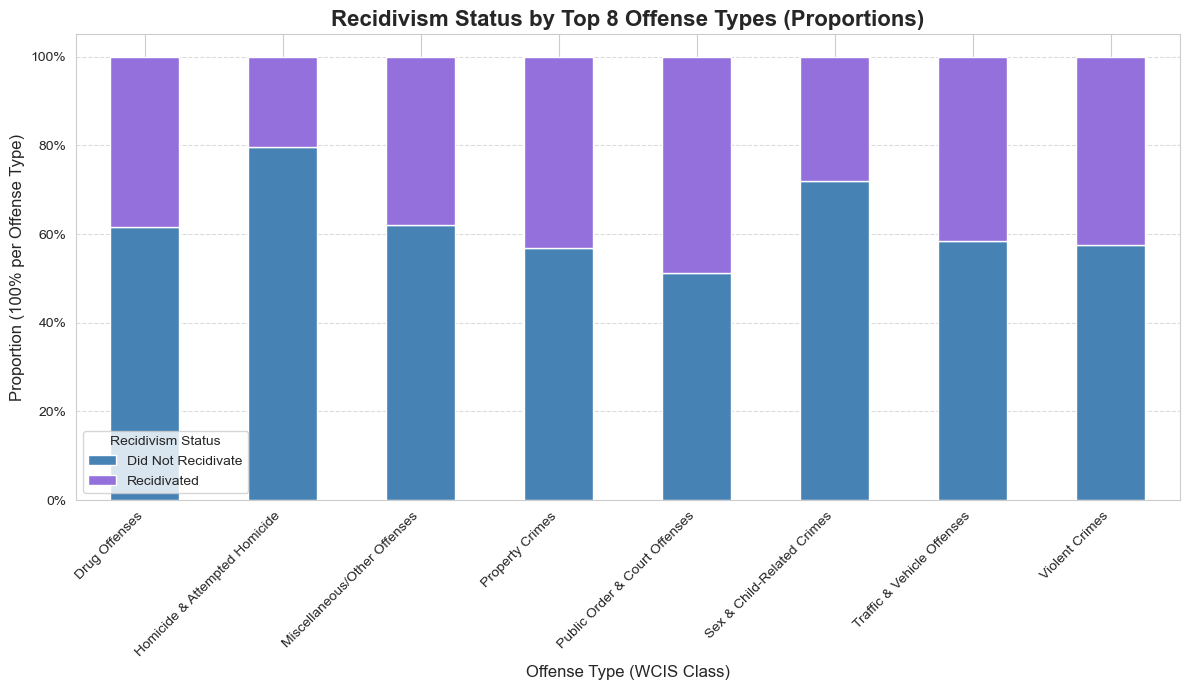

In [ ]:
#plot to show recidivism rate by wcisclass
top_8_wcis = df['wcisclass'].value_counts().nlargest(8).index
df_filtered = df[df['wcisclass'].isin(top_8_wcis)]
obs_wcis = pd.crosstab(df_filtered['wcisclass'], df_filtered['is_recid_new'])
obs_wcis.columns = ['Did Not Recidivate', 'Recidivated']
obs_wcis = obs_wcis[['Did Not Recidivate', 'Recidivated']]

obs_proportion_wcis = obs_wcis.div(obs_wcis.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(12, 7))
obs_proportion_wcis.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['#4682B4', '#9370DB']
)
plt.title('Recidivism Status by Top 8 Offense Types (Proportions)', fontsize=16, fontweight='bold')
plt.xlabel('Offense Type (WCIS Class)', fontsize=12)
plt.ylabel('Proportion (100% per Offense Type)', fontsize=12)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.xticks(rotation=45, ha='right')
plt.legend(
    title='Recidivism Status',
    labels=['Did Not Recidivate', 'Recidivated'],
    loc='lower left'
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

it seems like both female and male usually recid in traffic& vehicle offenses

## Recidivism VS Non -race

### Observed vs. Expected Frequencies Comparison Table ###

### Chi-square Test of Independence Results ###
Chi-square Statistic: 8529.1145
P-value: 0.0000

### Chi-square Test of Independence Results sample ###
Chi-square Statistic sample: 509.2136
P-value sample : 0.0000


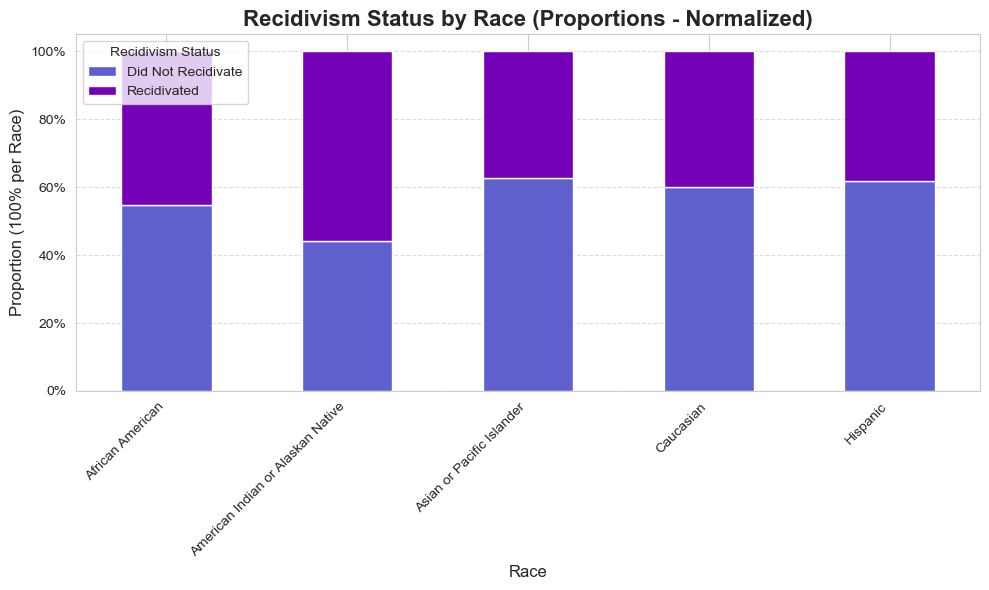

In [ ]:
# check chi2_contingency ,rece and recidivism
contingency_table = pd.crosstab(df['race'], df['is_recid_new'])
chi2_stat, p_val, dof, expected_array = chi2_contingency(contingency_table)

print("\n" + "="*60 #all data
print("### Chi-square Test of Independence Results ###")
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")
print("\n" + "="*60)
print("### Chi-square Test of Independence Results sample ###") # ttaet sample
contingency_table = pd.crosstab(df_sample['race'], df_sample['is_recid_new'])
chi2_stat, p_val, dof, expected_array = chi2_contingency(contingency_table)
print(f"Chi-square Statistic sample: {chi2_stat:.4f}")
print(f"P-value sample : {p_val:.4f}")

obs = pd.crosstab(df['race'], df['is_recid_new'])
obs.columns = ['Not_Recidivist', 'Recidivist']
obs = obs[['Not_Recidivist', 'Recidivist']]
obs_proportion = obs.div(obs.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(10, 6))
obs_proportion.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['#5e60ce', '#7400b8']
)
plt.title('Recidivism Status by Race (Proportions - Normalized)', fontsize=16, fontweight='bold')
plt.xlabel('Race', fontsize=12)
plt.ylabel('Proportion (100% per Race)', fontsize=12)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.xticks(rotation=45, ha='right')
plt.legend(
    title='Recidivism Status',
    labels=['Did Not Recidivate', 'Recidivated'],
    loc='upper left'
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


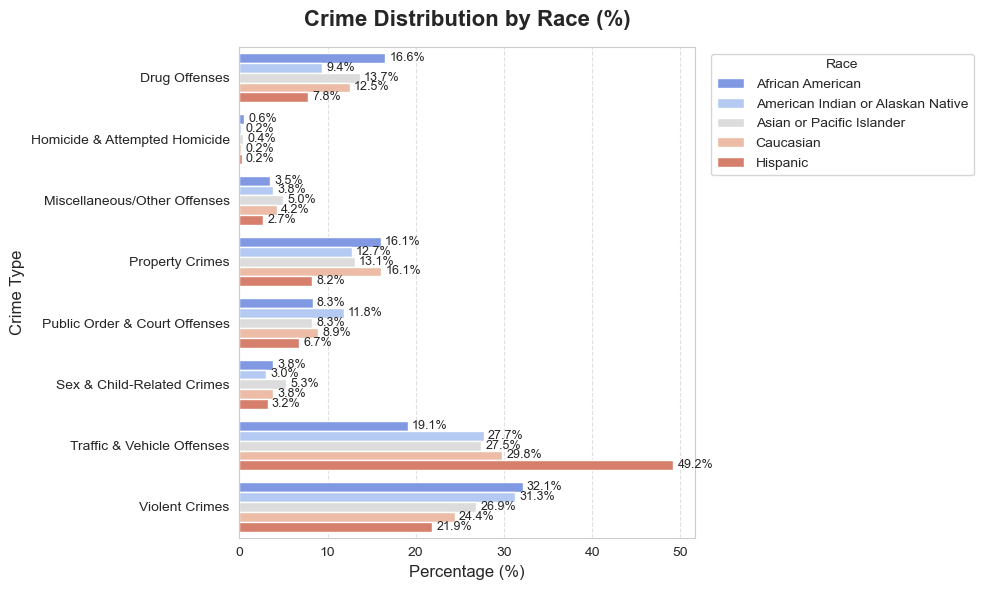

In [ ]:
#plot to describe each race what its most common wcisclass
table = (df.groupby(['race', 'wcisclass'])
         .size()
         .reset_index(name='Count'))
#100% precent for every race
table['Percent%'] = (
    table.groupby('race')['Count']
    .apply(lambda x: 100 * x / x.sum())
    .reset_index(drop=True)
)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=table,
    y='wcisclass',
    x='Percent%',
    hue='race',
    palette='coolwarm'
)


for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title('Crime Distribution by Race (%)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.legend(title='Race', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Recidivism Vs None -case type

In [ ]:
felony = df[df['case_type'] == 'Felony']['age_offense']
misdemeanor = df[df['case_type'] == 'Misdemeanor']['age_offense']
traffic = df[df['case_type'] == 'Criminal Traffic']['age_offense']
f_s("F-statistic:", f_stat)
print("p-value:", p_val)
# sample
print("="*60)
felony = df_sample[df_sample['case_type'] == 'Felony']['age_offense']
misdemeanor = df_sample[df_sample['case_type'] == 'Misdemeanor']['age_offense']
traffic = df_sample[df_sample['case_type'] == 'Criminal Traffic']['age_offense']
f_stat, p_val = f_onewtat, p_val = f_oneway(felony, misdemeanor, traffic)
printay(felony, misdemeanor, traffic)
print("F-statistic sample:", f_stat)
print("p-value sample :", p_val)


There are some low different between the types but,seemed type

#### T_test for demographic,sochial and enviroment features

In [ ]:
cols_dmog=['pct_male','pct_black','pct_college','pct_food_stamps','med_hhinc','pct_hisp','pct_urban','pop_dens','pct_somecollege','pct_rural']
df['is_recid_new'] = df['is_recid_new'].astype(int)
palette = {0: '#00BFFF', 1: '#8A2BE2'}

sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 14))

for col in cols_dmog:
    recid_col=recid_group[col]
    non_recid_col=non_recid_group[col]
    t_stat,p_value=stats.ttest_ind(recid_col,non_recid_col)
    print(f"Ttest for: {col}")
    print(f'T-statistic: {t_stat}')
    print(f'P-value: {p_value}')
    print("-"*60)
    recid_col=recid_sample[col]
    non_recid_col=non_recid_sample[col]
    t_stat,p_value=stats.ttest_ind(recid_col,non_recid_col)
    print(f'T-statistic sample: {t_stat}')
    print(f'P-value sample: {p_value}')
    if p_value<0.05:
        print(f"there is significant difference between {col} and recidivism")
    print("="*60)
     plt.subplot(4, 3, i)

    # נקודות לפי hue
    sns.scatterplot(
        data=df,
        x=col,
        y='is_recid_new',
        hue='is_recid_new',
        palette=palette,
        alpha=0.4,
        s=30,
        edgecolor=None
    )

    # קו רגרסיה כללי
    sns.regplot(
        data=df,
        x=col,
        y='is_recid_new',
        scatter=False,
        color='#00FFFF',
        lowess=True,
        line_kws={'lw': 2.5, 'alpha': 0.8}
    )

    plt.title(col.replace('_', ' ').title(), fontsize=11, fontweight='bold', color='#222831')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(title='Recidivism', labels=['No', 'Yes'], fontsize=8, title_fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.suptitle('Linear Relationship Between Demographic Variables and Recidivism (Hue by Recidivism)',
             fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Ttest for: pct_male
T-statistic: 36.50481030578428
P-value: 1.2756063320070143e-291
------------------------------------------------------------
T-statistic sample: 9.36966952392786
P-value sample: 7.482509160402199e-21
there is significant difference between pct_male and recidivism
Ttest for: pct_black
T-statistic: -42.87963450133433
P-value: 0.0
------------------------------------------------------------
T-statistic sample: -10.618363345540974
P-value sample: 2.5632135761916225e-26
there is significant difference between pct_black and recidivism
Ttest for: pct_college
T-statistic: -2.9333874545898757
P-value: 0.003352905932752133
------------------------------------------------------------
T-statistic sample: -0.8567673218502442
P-value sample: 0.3915764073567929
Ttest for: pct_food_stamps
T-statistic: -15.281913522841082
P-value: 1.0192387725847541e-52
------------------------------------------------------------
T-statistic sample: -4.907247605461395
P-value sample: 9.2569490481871

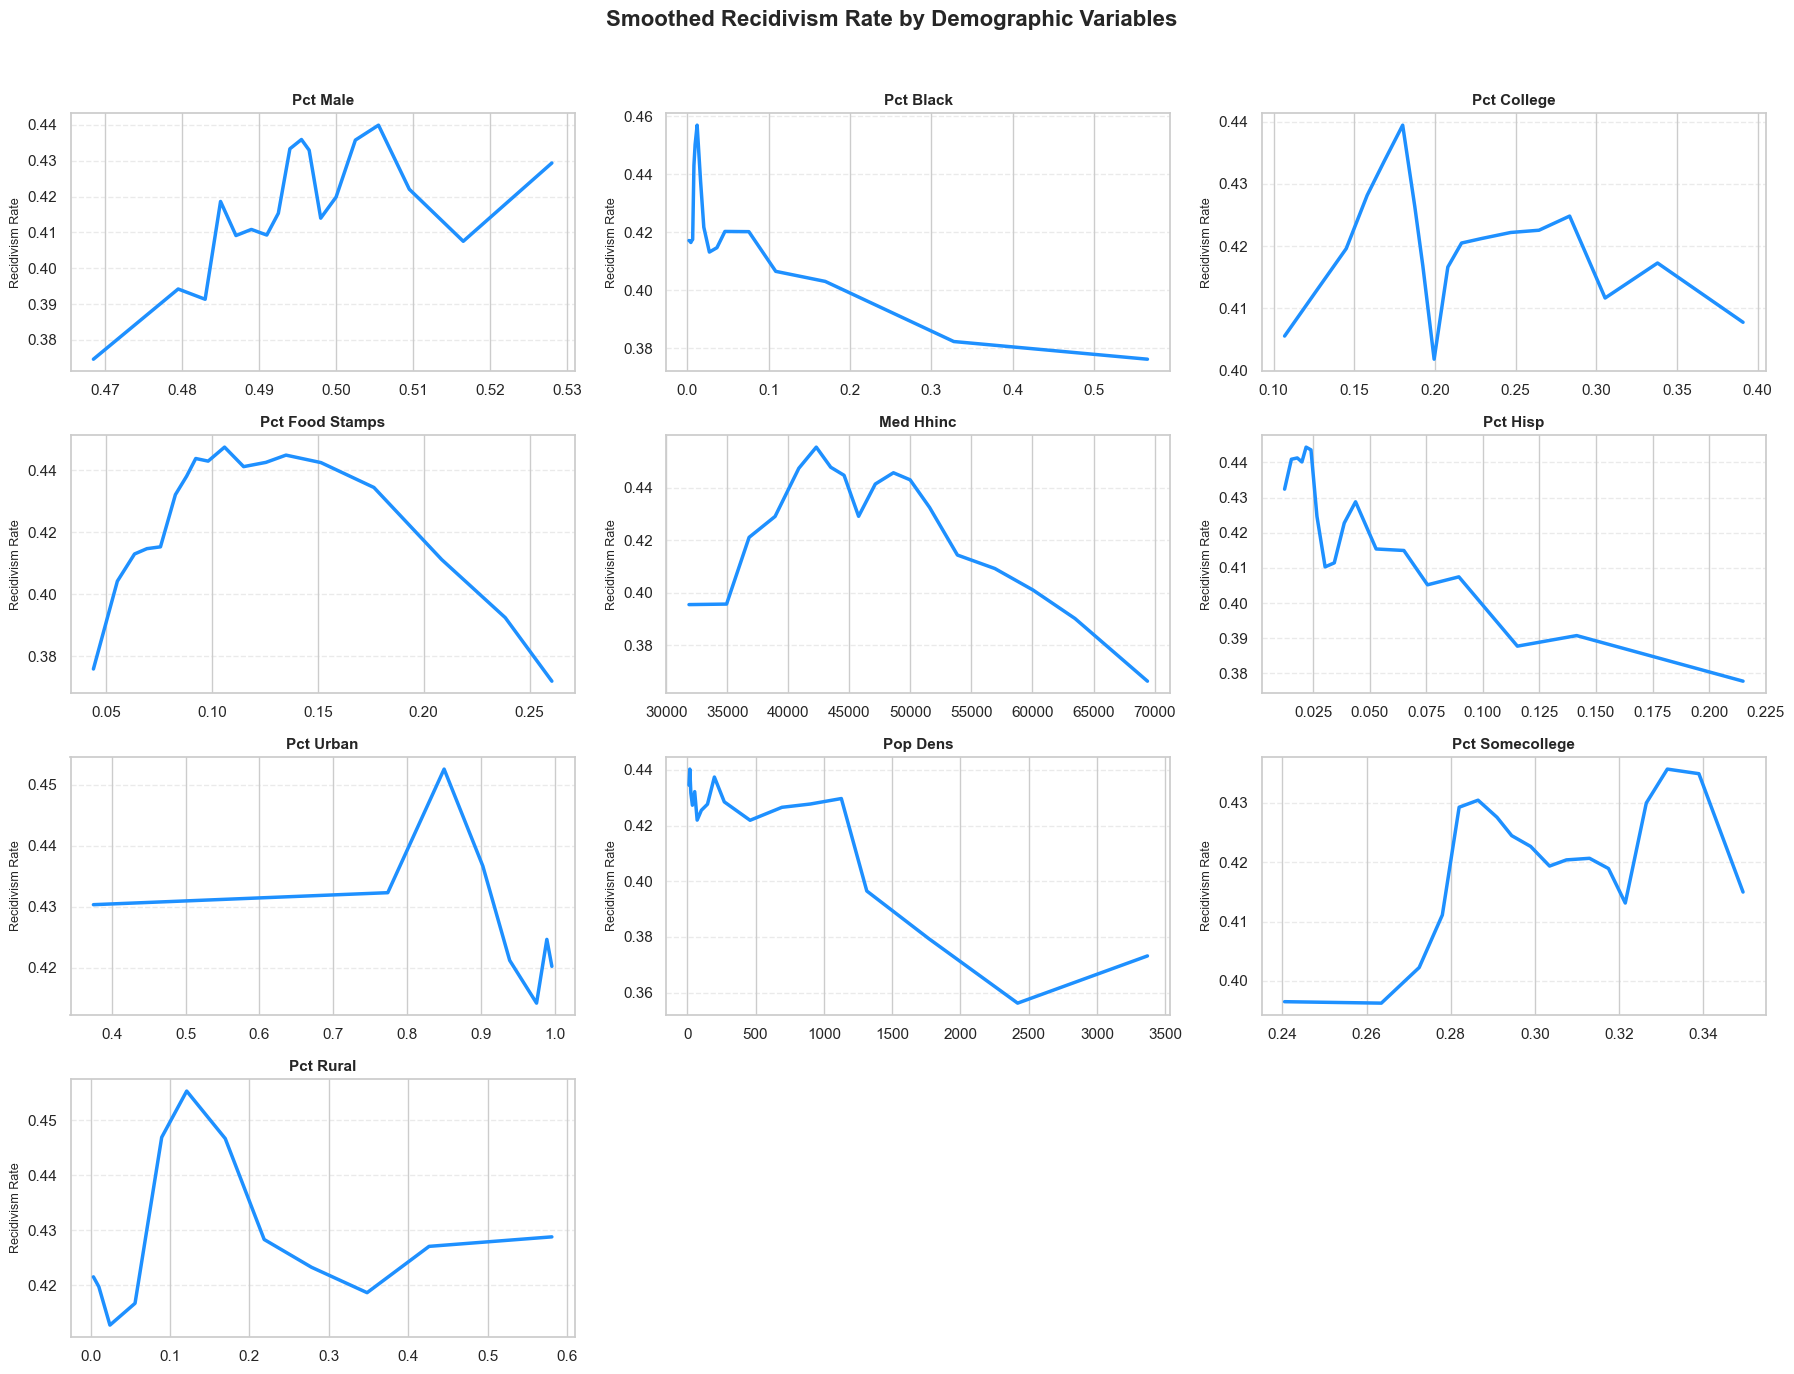

In [ ]:
# Smoothed line showing the trend between demographic variable and recidivism rate (using rolling mean)

df['is_recid_new'] = df['is_recid_new'].astype('float')

cols_dmog = [
    'pct_male','pct_black','pct_college','pct_food_stamps','med_hhinc',
    'pct_hisp','pct_urban','pop_dens','pct_somecollege','pct_rural'
]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 14))

for i, col in enumerate(cols_dmog, 1):
    plt.subplot(4, 3, i)
    df['bin'] = pd.qcut(df[col], q=20, duplicates='drop')
    plot_df = df.groupby('bin', observed=False)['is_recid_new'].mean().reset_index()
    plot_df['x'] = plot_df['bin'].apply(lambda x: x.mid if hasattr(x, 'mid') else np.nan)
    plot_df['smooth'] = plot_df['is_recid_new'].rolling(window=3, center=True).mean()
    sns.lineplot(
        data=plot_df,
        x='x',
        y='smooth',
        color='#1E90FF',
        linewidth=2.5
    )
    plt.title(col.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Recidivism Rate', fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.suptitle('Smoothed Recidivism Rate by Demographic Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
#A study of criminals in places with a lower economic index shows how much higher the recidivism rates are
df['income_level'] = pd.qcut(df['med_hhinc'], q=3, labels=['Low', 'Medium', 'High'])
recid_rates = (
    df.groupby('income_level')['is_recid_new']
    .mean()
    .rename('recidivism_rate')
    .reset_index()
)
print(recid_rates)
low_rate  = recid_rates.loc[recid_rates['income_level']=='Low', 'recidivism_rate'].values[0]
high_rate = recid_rates.loc[recid_rates['income_level']=='High', 'recidivism_rate'].values[0]
ratio = low_rate / high_rate
print(f"Recidivism rate is {ratio:.2f} times higher in low-income areas.")

  income_level  recidivism_rate
0          Low             0.42
1       Medium             0.44
2         High             0.39
Recidivism rate is 1.06 times higher in low-income areas.


In [ ]:
df['urban_level'] = pd.cut(
    df['pct_urban'],
    bins=[0, 0.3, 0.7, 1],
    labels=['Rural', 'Semi-urban', 'Urban'],
    include_lowest=True
)
recid_rates = (
    df.groupby('urban_level')['is_recid_new']
    .mean()
    .rename('recidivism_rate')
    .reset_index()
)
recid_rates

urban_level  recidivism_rate
0       Rural             0.43
1  Semi-urban             0.41
2       Urban             0.41

In [ ]:
df['foodstamps_level'] = pd.qcut(df['pct_food_stamps'],q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
food_rates = (
    df.groupby('foodstamps_level')['is_recid_new']
    .mean()
    .rename('recidivism_rate')
    .reset_index()
)
food_rates

foodstamps_level  recidivism_rate
0         Very Low             0.39
1              Low             0.42
2           Medium             0.44
3             High             0.44
4        Very High             0.39

## History offesend

In [ ]:
# there is significant difference between pop_dens and recidivism
avg_hist_jail_recid=recid_group.avg_hist_jail
avg_hist_jail_non_recid=non_recid_group.avg_hist_jail
t_stat,p_value=stats.ttest_ind(avg_hist_jail_recid,avg_hist_jail_non_recid)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: nan
P-value: nan


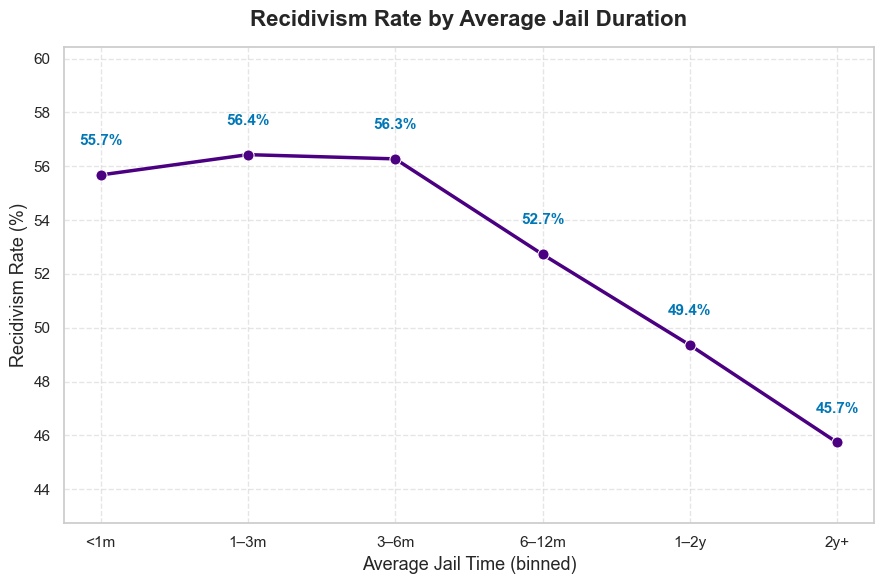

In [ ]:
# Create jail duration bins
df['is_recid_new'] = pd.to_numeric(df['is_recid_new'], errors='coerce')
df['jail_bins'] = pd.cut(
    df['avg_hist_jail'],
    bins=[0, 30, 90, 180, 365, 730, df['avg_hist_jail'].max()],
    labels=['<1m', '1–3m', '3–6m', '6–12m', '1–2y', '2y+']
)

# Calculate mean and convert to percentage
grouped = (
    df.groupby('jail_bins')['is_recid_new']
      .mean()
      .reset_index()
      .rename(columns={'is_recid_new': 'Recidivism_Rate'})
)

grouped['Recidivism_Rate'] *= 100  # convert to percentage

# Plot
plt.figure(figsize=(9,6))
sns.set_theme(style="whitegrid")

#
sns.lineplot(
    data=grouped,
    x='jail_bins',
    y='Recidivism_Rate',
    marker='o',
    linewidth=2.5,
    markersize=8,
    color='#4B0082'  # deep purple
)

for x, y in zip(grouped['jail_bins'], grouped['Recidivism_Rate']):
    plt.text(
        x, y + 1.0, f'{y:.1f}%',
        ha='center', va='bottom',
        fontsize=11, fontweight='bold', color='#0077b6'
    )

plt.title('Recidivism Rate by Average Jail Duration', fontsize=16, weight='bold', pad=15)
plt.xlabel('Average Jail Time (binned)', fontsize=13)
plt.ylabel('Recidivism Rate (%)', fontsize=13)
plt.ylim(grouped['Recidivism_Rate'].min() - 3, grouped['Recidivism_Rate'].max() + 4)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### **Conclusion** The highest recidivism rate is among those whose average prison term was between one and eight months.

#### T_test and graphs to disribution history offense

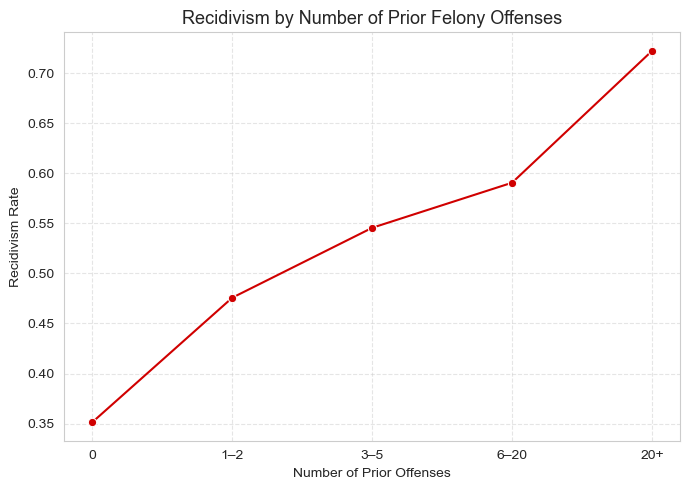

The significant difference between prior_felony &recidivism
T-statistic: 169.91736257200313
P-value: 0.0


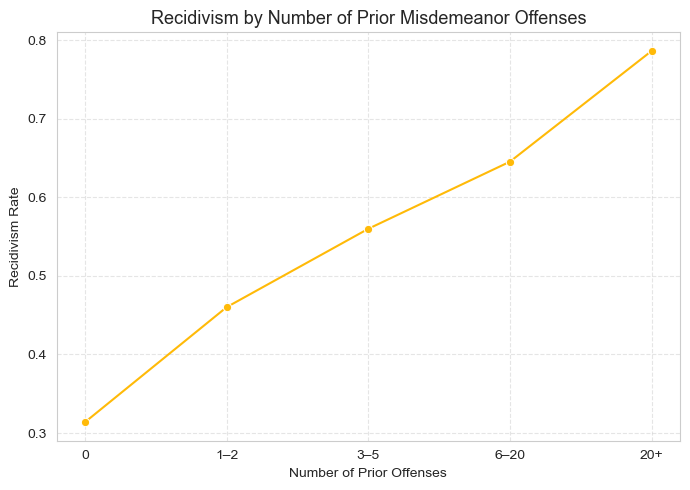

The significant difference between prior_misdemeanor &recidivism
T-statistic: 235.88015477553364
P-value: 0.0


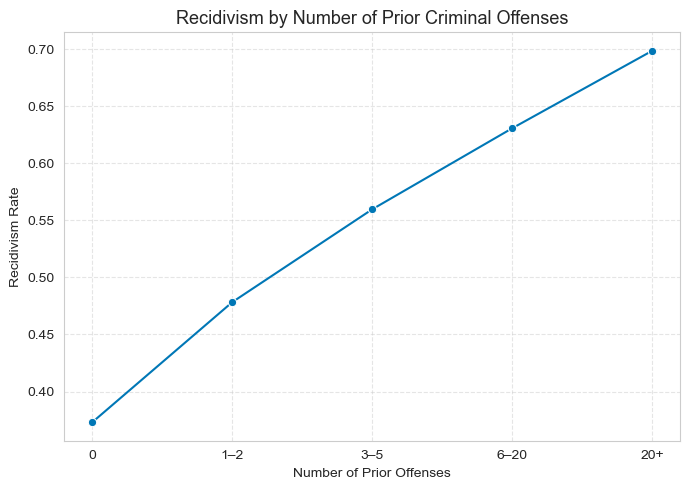

The significant difference between prior_criminal_traffic &recidivism
T-statistic: 153.65264513099467
P-value: 0.0


In [ ]:

cols = ['prior_felony', 'prior_misdemeanor', 'prior_criminal_traffic']
colors = ['#d00000', '#ffba08', '#0077b6']
for col, color in zip(cols, colors):
    df[f'{col}_bin'] = pd.cut(
        df[col],
        bins=[-1, 0, 2, 5, 20, df[col].max()],
        labels=['0', '1–2', '3–5', '6–20', '20+']
    )
    grouped = (
        df.groupby(f'{col}_bin')['is_recid_new']
        .mean()
        .reset_index()
    )
    plt.figure(figsize=(7,5))
    sns.lineplot(
        data=grouped,
        x=f'{col}_bin',
        y='is_recid_new',
        marker='o',
        color=color
    )
    plt.title(f'Recidivism by Number of Prior {col.split("_")[1].capitalize()} Offenses', fontsize=13)
    plt.xlabel('Number of Prior Offenses')
    plt.ylabel('Recidivism Rate')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    col_recid=recid_group[col]
    col_non_recid=non_recid_group[col]
    t_stat,p_value=stats.ttest_ind(col_recid,col_non_recid)
    print(f"The significant difference between {col} &recidivism")
    print(f'T-statistic: {t_stat}')
    print(f'P-value: {p_value}')




##### **Conclusion**
In those plots ⬆️, prior offenses strongly affect the recidivism rate

In [ ]:
#ttest for year
year_recid=recid_group.year
year_non_recid=non_recid_group.year
t_stat,p_value=stats.ttest_ind(year_non_recid,year_recid)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 73.73872437444396
P-value: 0.0


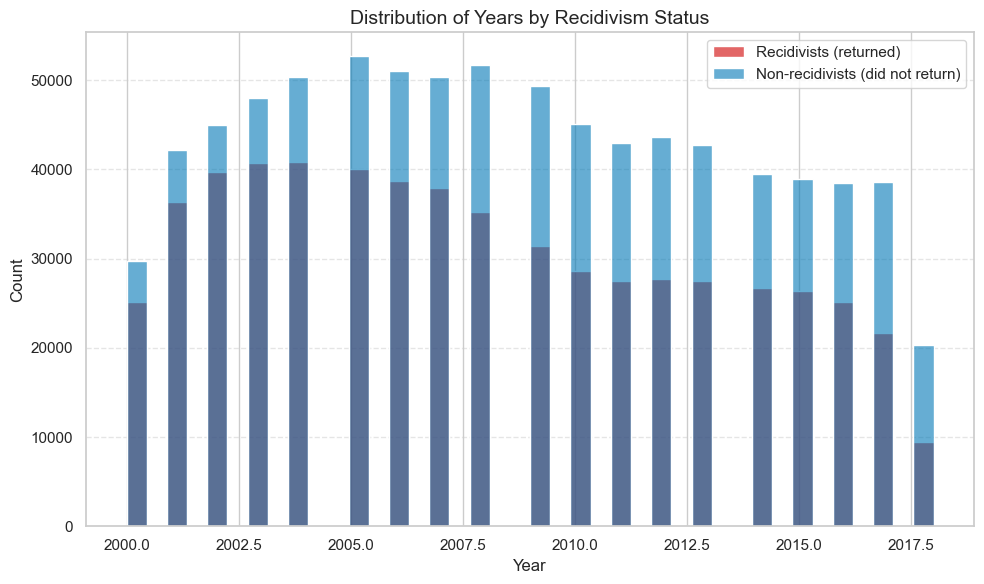

In [ ]:
# distribution of years
plt.figure(figsize=(10,6))
sns.histplot(year_recid, bins=40, color="#d00000", alpha=0.6, label="Recidivists (returned)")
sns.histplot(year_non_recid, bins=40, color="#0077b6", alpha=0.6, label="Non-recidivists (did not return)")
plt.title("Distribution of Years by Recidivism Status", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The distribution analysis indicates a clear trend of decreasing recidivism rates over the years.
While relatively high recidivism rates were observed in earlier years,
a consistent decrease can be seen in later years.
This finding may reflect the effects of technological development,
strengthening of supervision and monitoring systems,
and improvements in rehabilitation processes and criminal policy in recent decades.


### Trial period ralease / probition

### Chi-square Results: Release Status vs. Recidivism Status ###
Chi-square Statistic: 3679.0636
p-value: 0.00000000


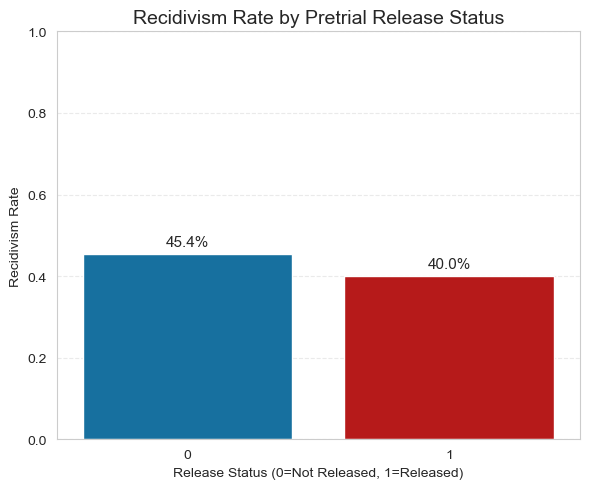

In [ ]:
contingency_release = pd.crosstab(df['release'], df['is_recid_new'])
chi2_release, p_val_release, dof_release, expected_release = chi2_contingency(contingency_release)
print("="*60)
print("### Chi-square Results: Release Status vs. Recidivism Status ###")
print(f"Chi-square Statistic: {chi2_release:.4f}")
print(f"p-value: {p_val_release:.8f}")
release_rate = (
    df.groupby('release')['is_recid_new']
    .mean()
    .reset_index(name='recidivism_rate')
)
plt.figure(figsize=(6,5))
sns.barplot(data=release_rate, x='release', y='recidivism_rate', palette=['#0077b6','#d00000'])
plt.title('Recidivism Rate by Pretrial Release Status', fontsize=14)
plt.xlabel('Release Status (0=Not Released, 1=Released)')
plt.ylabel('Recidivism Rate')
plt.ylim(0,1)
for i,row in release_rate.iterrows():
    plt.text(i, row['recidivism_rate']+0.02, f"{row['recidivism_rate']*100:.1f}%", ha='center', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Chi-square Results: probation Status vs. Recidivism Status ###
Chi-square Statistic: 2834.7104
p-value: 0.00000000


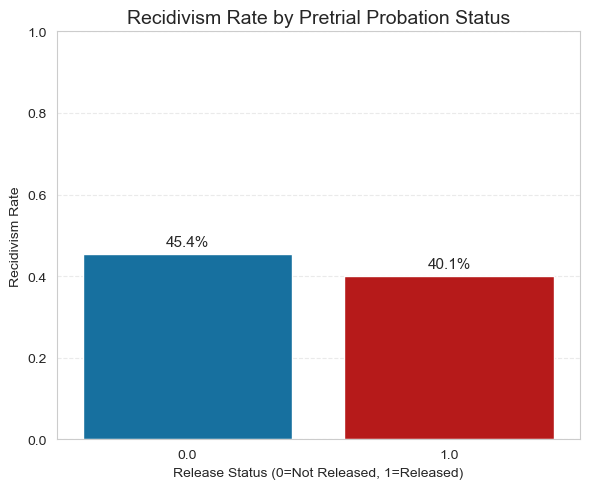

In [ ]:
contingency_probation = pd.crosstab(df['probation'], df['is_recid_new'])
chi2_probation, p_val_probation, dof_probation, expected_probation = chi2_contingency(contingency_probation)
print("="*60)
print("### Chi-square Results: probation Status vs. Recidivism Status ###")
print(f"Chi-square Statistic: {chi2_probation:.4f}")
print(f"p-value: {p_val_probation:.8f}")
release_rate = (
    df.groupby('probation')['is_recid_new']
    .mean()
    .reset_index(name='recidivism_rate')
)
plt.figure(figsize=(6,5))
sns.barplot(data=release_rate, x='probation', y='recidivism_rate', palette=['#0077b6','#d00000'])
plt.title('Recidivism Rate by Pretrial Probation Status', fontsize=14)
plt.xlabel('Release Status (0=Not Released, 1=Released)')
plt.ylabel('Recidivism Rate')
plt.ylim(0,1)
for i,row in release_rate.iterrows():
    plt.text(i, row['recidivism_rate']+0.02, f"{row['recidivism_rate']*100:.1f}%", ha='center', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
#Are those who are released also more likely to receive probation?
contingency_rel_prob = pd.crosstab(df['release'], df['probation'])
print(contingency_rel_prob)

probation    0.00    1.00
release                  
0          501468       0
1               0  530852


**Conclusion**: Both variables reflect the same information: everyone who was
in prison at the time the case was organized did not receive probation and everyone who was
released received probation. This is essentially the same variable, and therefore one of them can be removed.